# Predicting Strokes:An Analysis of Risk Factors

##### Author: Misun Song
##### Data Source: Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

## 1. Import data and necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

## 2. Exploring the Data and Gaining Insights

### 2.1. Data Structure Overview

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe(include = 'all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [8]:
col_names = df.columns
col_names = col_names.to_list()
col_names

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- To better organize our data, let's divide our features into two types: 1) categorical and 2) numerical. 
- Categorical features are those that describe characteristics or categories, such as gender or color, while numerical features are those that have a numerical value, such as age or height.

### 2.2. Basic Data Preparation

- The 'id' feature has no meaningful information and cannot provide any insights. We will remove it from the dataset.

In [10]:
df = df.drop('id', axis = 1)

- We create a pair plot using the existing features to identify correlations, visualize distributions, and spot trends.

In [11]:
cat_names = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
int_names = ['age', 'avg_glucose_level', 'bmi']

In [12]:
for name in cat_names + int_names:
    print(name)
    print(df[name].unique())
    print(len(df[name].unique()))
    print()

gender
['Male' 'Female' 'Other']
3

hypertension
[0 1]
2

heart_disease
[1 0]
2

ever_married
['Yes' 'No']
2

work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
5

Residence_type
['Urban' 'Rural']
2

smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
4

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+

- During our data cleaning process, we discovered an error in the 'gender' feature, where one observation was labeled as 'Other'. 
- As this is an invalid value for this feature, we have decided to remove this particular observation from our dataset.

In [13]:
df.query("gender == 'Other'")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [14]:
df['gender'].value_counts(ascending = False)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [15]:
mask = df['gender'] == 'Other'
df = df.drop(df[mask].index)

- The 'gender' and 'ever_married' features can be efficiently one-hot encoded using built-in pandas functions, without the need for the get_dummies() function.
- Therefore, we utilize this approach to perform one-hot encoding.

In [16]:
df['gender'] = np.where(df['gender'] == 'Male', 1, 0)

In [17]:
# we also change the values in 'ever_married' corresponding to other categorical variables, either 1 or 0
df['ever_married'] = np.where(df['ever_married'] == 'Yes', 1, 0)

- The data type of the 'age' feature is currently set as float. Since age is a discrete variable, we convert it to integer format for easier handling and analysis.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 479.0+ KB


In [19]:
df['age'] = df['age'].astype(int)

In [20]:
for feature in cat_names:
    df[feature] = df[feature].astype(str)

### 2.3. Plotting Variables

#### 2.3.1. Pair Plot

- By creating a pair plot, we can identify potential correlations, see patterns and trends, and identify any outliers or anomalies. 

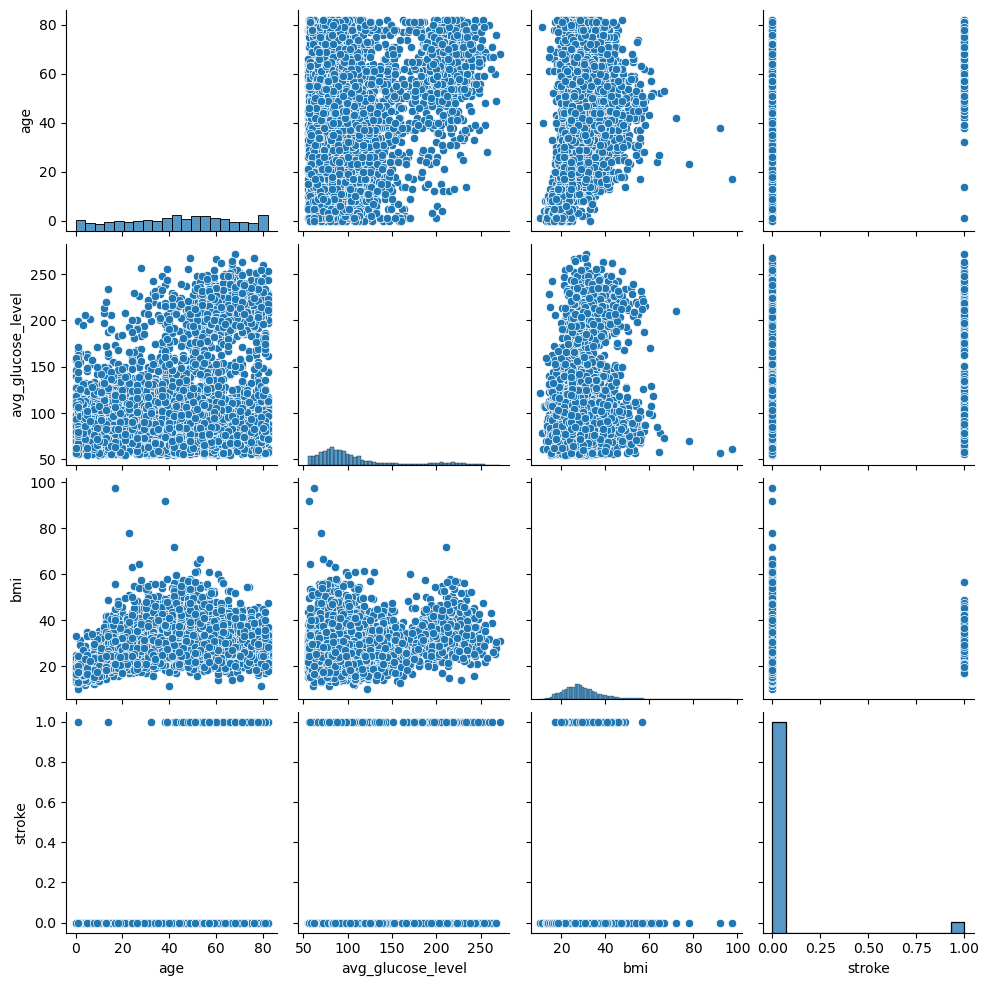

In [21]:
sns.pairplot(df)

#### 2.3.2. Count Plots for Categorical Variables

- We have many categorical variables in our dataset and it was challenging to gain meaningful insights from them through manual inspection.
- To better understand the distribution of our categorical data, we create a countplot for each categorical feature.

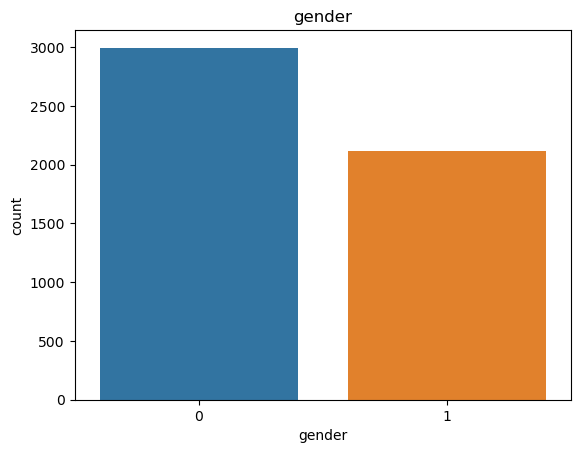

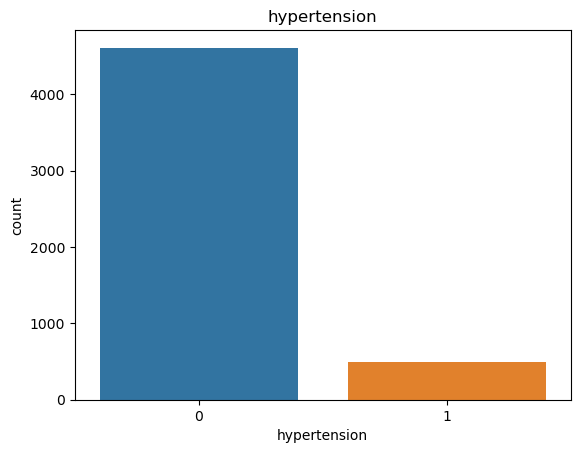

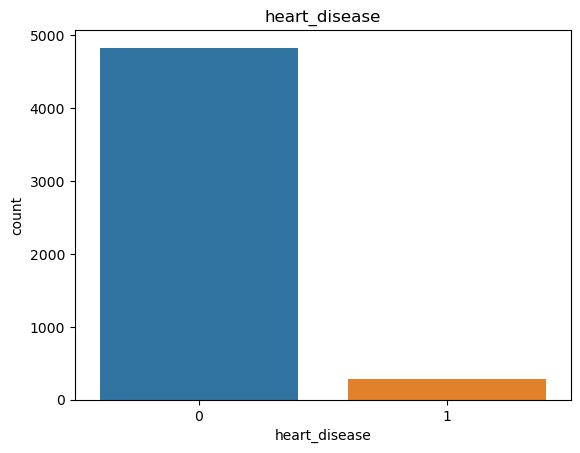

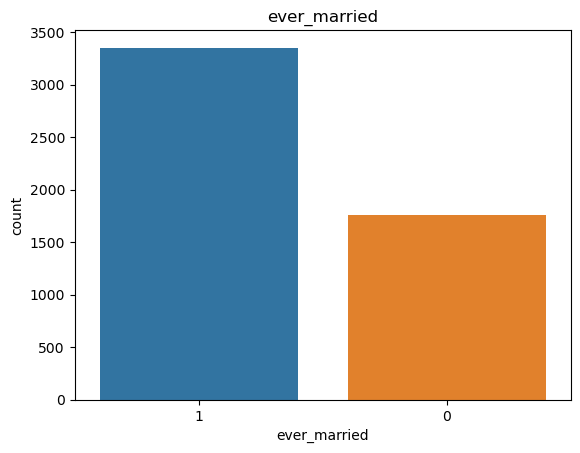

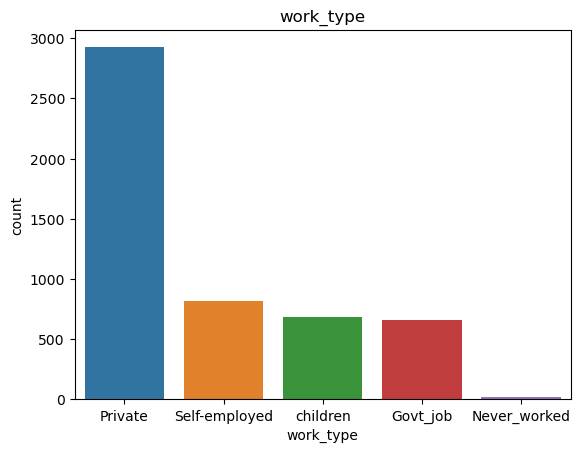

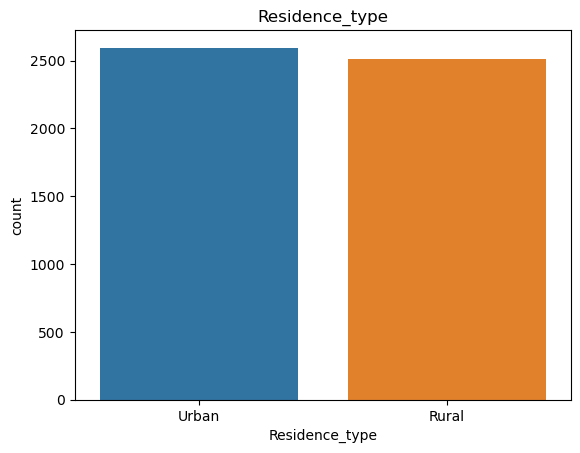

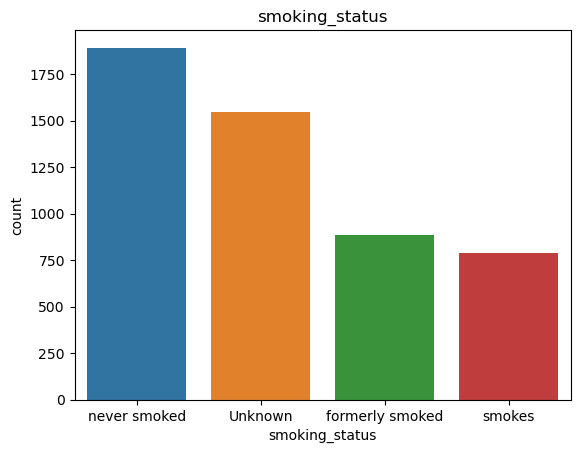

In [22]:
for name in cat_names:
    sns.countplot(x = name, data=df, order = df[name].value_counts().index[::1])
    plt.title(name)
    plt.show()

- We will continue our EDA by creating countplots for our categorical variables.
- To gain further insights, we will add one more layer to our analysis by examining the frequency of the 'stroke' variable in relation to each feature.

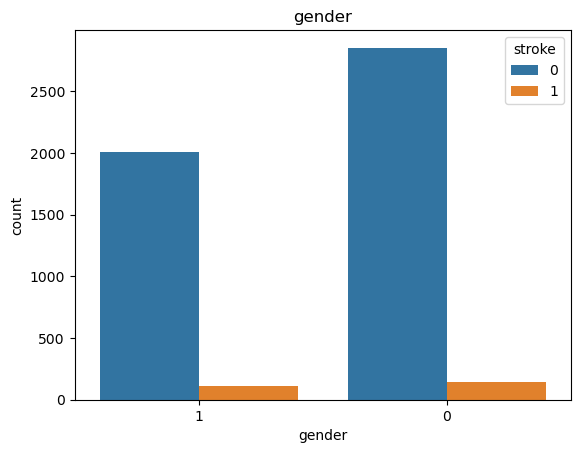

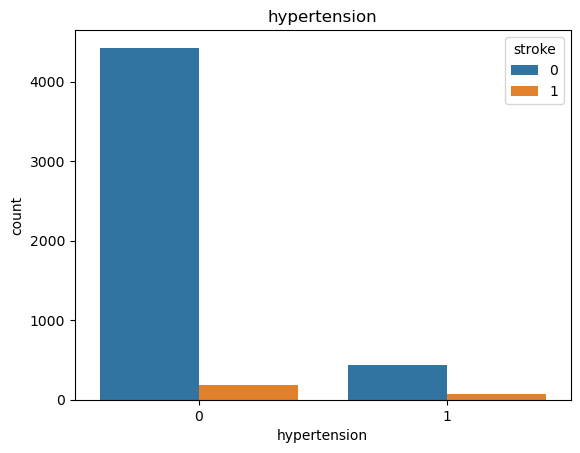

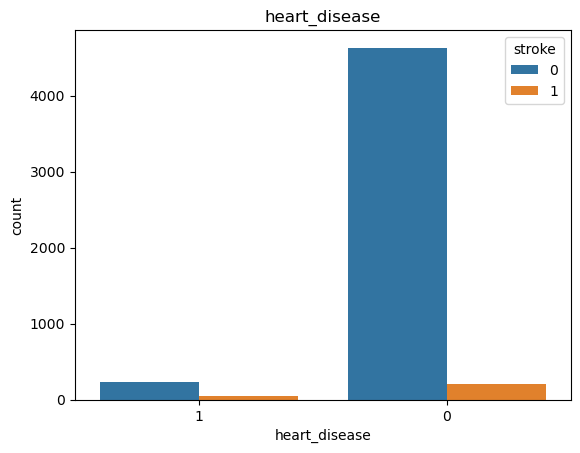

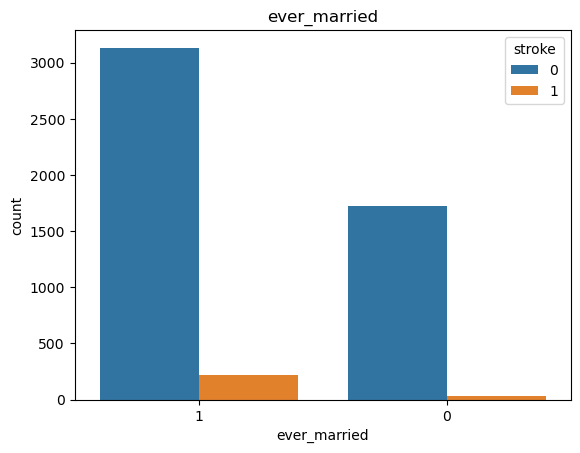

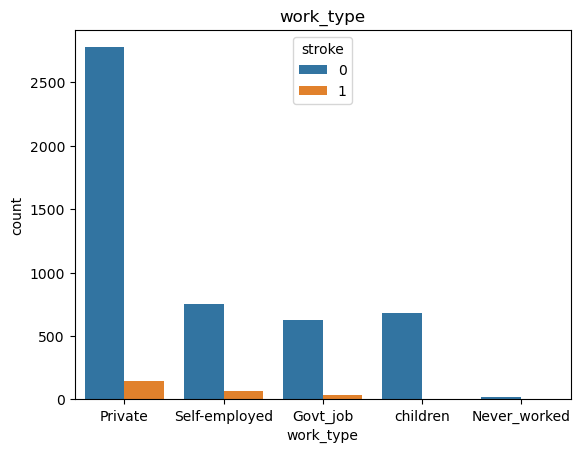

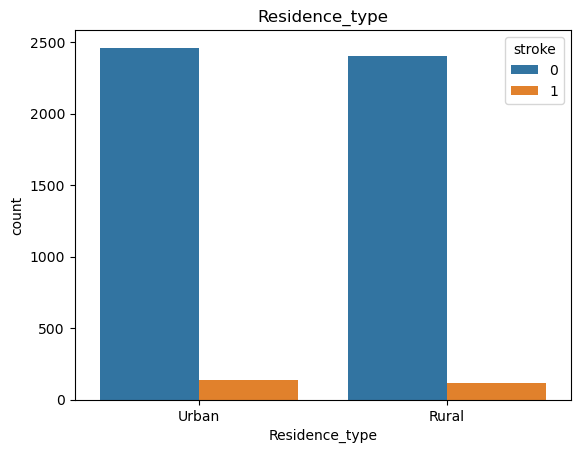

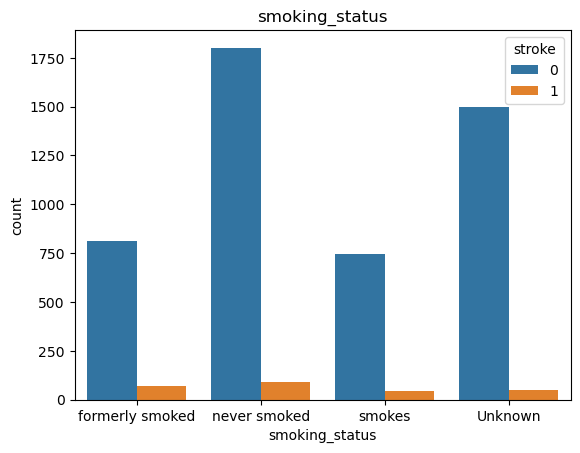

In [23]:
for name in cat_names: 
    sns.countplot(x = name, hue = 'stroke', data = df)
    plt.title(name)
    plt.show()

- To enhance the accuracy of our analysis, we calculate the percentage of stroke occurrences based on specific features or categories.
- By calculating probabilities, we can identify which variables have the strongest relationship with the outcome and use that information to inform our analysis and decision-making.
- Calculating probabilities allows for a more meaningful comparison between different categories or features, even if they have different sample sizes.

In [24]:
# This for loop shows the possibility of getting a stroke when having a certain feature

for name in cat_names: 
    stroke = df[df['stroke'] == 1]['stroke'].groupby(df[name]).count()
    total = df['stroke'].groupby(df[name]).count()
    stroke_ratio = (stroke / total * 100).sort_values(ascending = False)
    
    print(stroke_ratio)
    print()

gender
1    5.106383
0    4.709419
Name: stroke, dtype: float64

hypertension
1    13.253012
0     3.968770
Name: stroke, dtype: float64

heart_disease
1    17.028986
0     4.179599
Name: stroke, dtype: float64

ever_married
1    6.561288
0    1.651481
Name: stroke, dtype: float64

work_type
Self-employed    7.936508
Private          5.095759
Govt_job         5.022831
children         0.291121
Never_worked          NaN
Name: stroke, dtype: float64

Residence_type
Urban    5.200308
Rural    4.536411
Name: stroke, dtype: float64

smoking_status
formerly smoked    7.918552
smokes             5.323194
never smoked       4.756871
Unknown            3.044041
Name: stroke, dtype: float64



#### 2.3.3. Distplots for Numerical Variables

- To explore the distribution of our numerical features, we'll use distplots instead of countplots, which are better suited for categorical data.
- Countplot is used to visualize the frequency of categorical data, while distplot is used to visualize the distribution of continuous data.

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


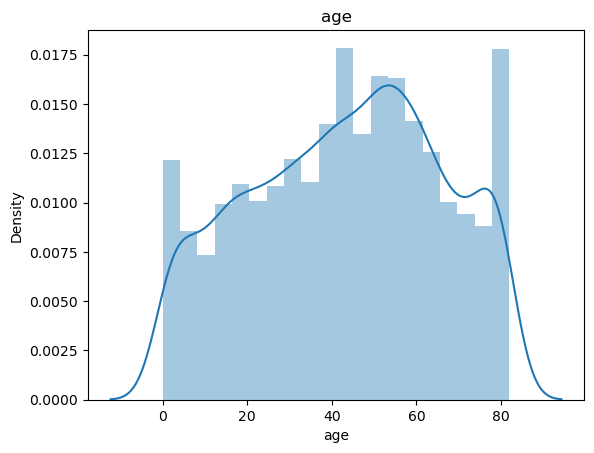

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


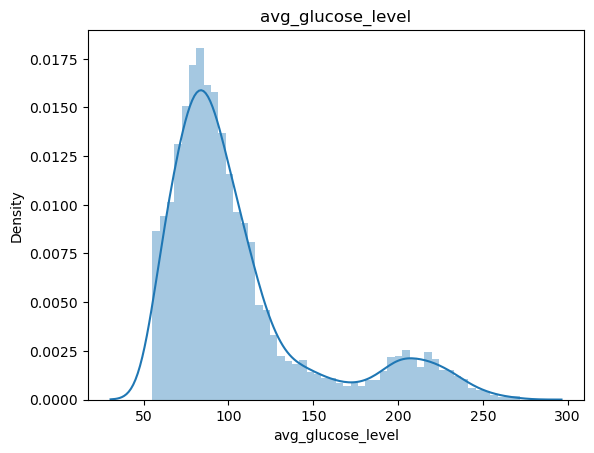

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


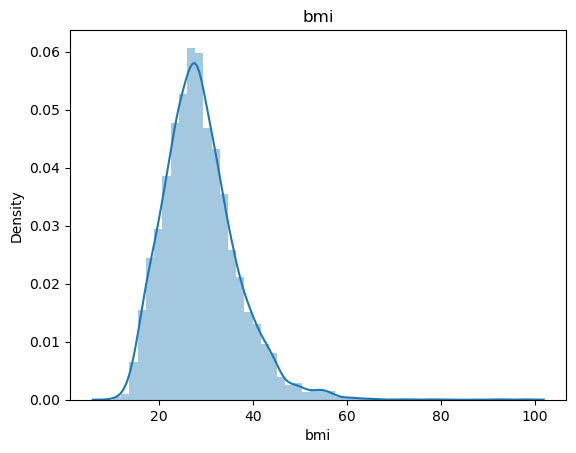

In [25]:
for name in int_names: 
    sns.distplot(df[name])
    plt.title(name)
    plt.show()

- We will explore our numerical variables with various plots. By using these plots, we can gain a better understanding of the distribution and relationship of our numerical variables with the stroke outcome.
1) Box plot: this will allow us to easily identify the distribution of our observations and detect any outliers.
2) Count plot: we will divide our continuous numerical variables into bins to create count plots. We will use external sources to define our bins, such as finding the 'normal' BMI and glucose ranges to identify how they can influence stroke.
3) Scatter plot: We will plot whether they had a stroke (red) or not (blue) to see if having a factor influences the likelihood of getting a stroke.

- Using a 10-year bin for an age variable can help to group individuals into meaningful age ranges, which can be useful for certain analyses.
- Additionally, grouping ages into bins can also help to reduce the impact of outliers or errors in the data

In [26]:
df['age'].max()

82

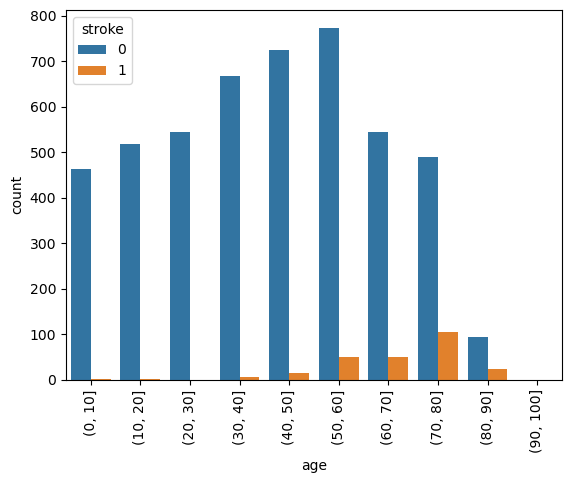

In [27]:
age_groups = pd.cut(df['age'], bins=range(0, 110, 10))

sns.countplot(x = age_groups, hue="stroke", data=df)
plt.xticks(rotation = 90)
plt.show()

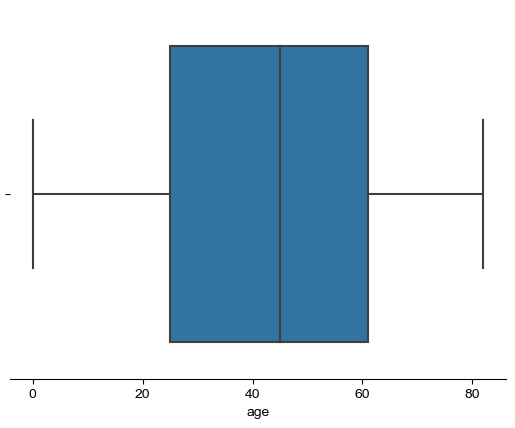

In [28]:
sns.boxplot(x='age', data=df)
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.despine(left=True)

plt.show()

/var/folders/zt/7p4x8_1d2wdgdv8_dqk8gg080000gn/T/ipykernel_68149/3670328069.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df['num_cat'].cat.rename_categories(['No Stroke', 'Stroke'], inplace=True)


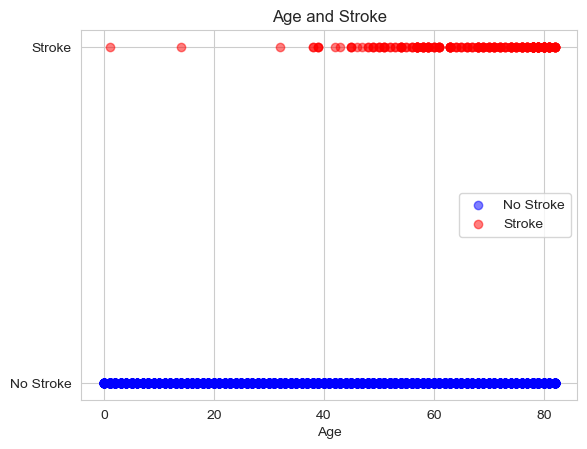

In [29]:
# Convert stroke variable to categorical
df['num_cat'] = df['stroke'].astype('category')
df['num_cat'].cat.rename_categories(['No Stroke', 'Stroke'], inplace=True)

# create separate dataframes for stroke and no stroke groups
df_stroke = df[df['num_cat'] == 'Stroke']
df_no_stroke = df[df['num_cat'] == 'No Stroke']

# plot dot plot for bmi with stroke and no stroke groups
plt.scatter(df_no_stroke['age'], ['No Stroke']*len(df_no_stroke), color='blue', alpha=0.5, label='No Stroke')
plt.scatter(df_stroke['age'], ['Stroke']*len(df_stroke), color='red', alpha=0.5, label='Stroke')

# set plot title, x-axis label and legend
plt.title('Age and Stroke')
plt.xlabel('Age')
plt.legend()

# show plot
plt.show()

- We group the age variable into 10-year intervals and count the frequency of stroke within each group, also calculating the percentage of stroke occurrence. 
- We use line plots to visualize how different age groups contribute to the occurrence of stroke.

In [30]:
df['stroke'].groupby(age_groups).count()

age
(0, 10]      464
(10, 20]     518
(20, 30]     544
(30, 40]     674
(40, 50]     739
(50, 60]     823
(60, 70]     594
(70, 80]     594
(80, 90]     116
(90, 100]      0
Name: stroke, dtype: int64

In [31]:
stroke_by_age = df[df['stroke'] == 1]['stroke'].groupby(age_groups).count()
stroke_by_age

age
(0, 10]        1
(10, 20]       1
(20, 30]       0
(30, 40]       6
(40, 50]      15
(50, 60]      49
(60, 70]      49
(70, 80]     105
(80, 90]      23
(90, 100]      0
Name: stroke, dtype: int64

In [32]:
Pstroke_by_age = df[df['stroke'] == 1]['stroke'].groupby(age_groups).count() / df['stroke'].groupby(age_groups).count() * 100
Pstroke_by_age

age
(0, 10]       0.215517
(10, 20]      0.193050
(20, 30]      0.000000
(30, 40]      0.890208
(40, 50]      2.029770
(50, 60]      5.953827
(60, 70]      8.249158
(70, 80]     17.676768
(80, 90]     19.827586
(90, 100]          NaN
Name: stroke, dtype: float64

In [33]:
stroke_by_age.reset_index(drop = True)
stroke_by_age.index = ['~10', '11~20', '21~30', '31~40', '41~50', '51~60', '61~70', '71~80', '81~90', '91~100']

Pstroke_by_age.reset_index(drop = True)
Pstroke_by_age.index = ['~10', '11~20', '21~30', '31~40', '41~50', '51~60', '61~70', '71~80', '81~90', '91~100']

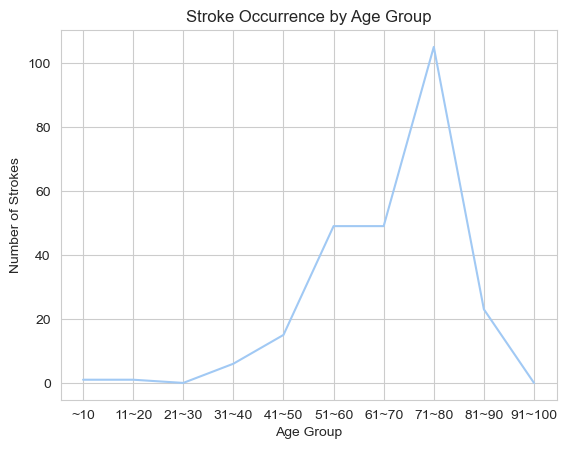

In [34]:
# Create a line plot
sns.lineplot(x=stroke_by_age.index, y=stroke_by_age.values)

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Strokes')
plt.title('Stroke Occurrence by Age Group')

# Show the plot
plt.show()

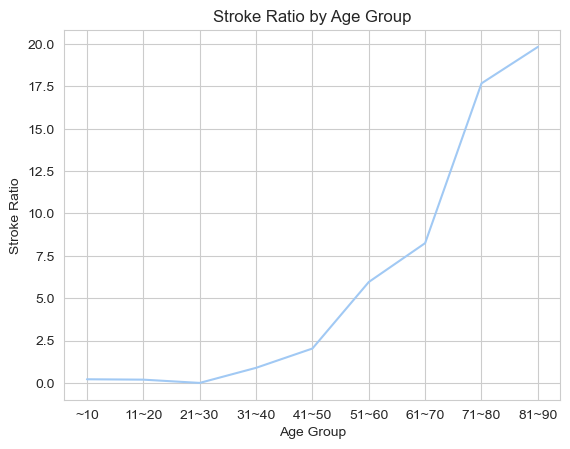

In [35]:
sns.lineplot(x = Pstroke_by_age.index, y = Pstroke_by_age.values)

plt.xlabel('Age Group')
plt.ylabel('Stroke Ratio')
plt.title('Stroke Ratio by Age Group')

plt.show()

- We have identified age group as a influential factor for stroke based on our analysis. 
- To make it easier to work with this feature, we create a new categorical feature called 'age_groups' by grouping ages into 10-year intervals.

In [36]:
# Create a list of bin edges
age_groups = [0, 30, 50, 70, 80, 90]

# Use pd.cut to create a new column with age bins
df['age_groups'] = pd.cut(df['age'], bins= age_groups, labels=['0-30', '31-50', '51~70', '71~80', '81~90']).astype(str)

- We repeat the same process we used for 'avg_glucose_level' for other numerical variables. 
- This involves investigating their distribution and relationship with the stroke outcome using various plots. 
- As we do this for 'glucose_level', we also consult external sources to determine the relationship between glucose level and diabetes.

##### Gluecose level range
1) Normal : 140 mg/dL or below
2) Pre-Diabetes: 140 – 199 mg/dL
3) Diabetes: 200 mg/dL or above

In [37]:
df['avg_glucose_level'].max()

271.74

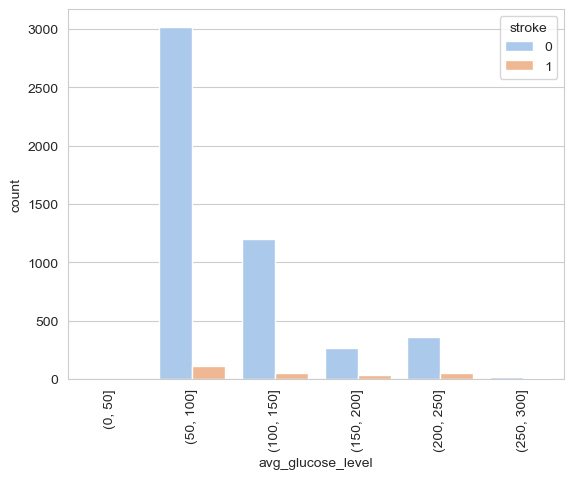

In [38]:
glucose_groups = pd.cut(df['avg_glucose_level'], bins = range(0, 310, 50))

sns.countplot(x = glucose_groups, hue = 'stroke', data = df)
plt.xticks(rotation = 90)
plt.show()

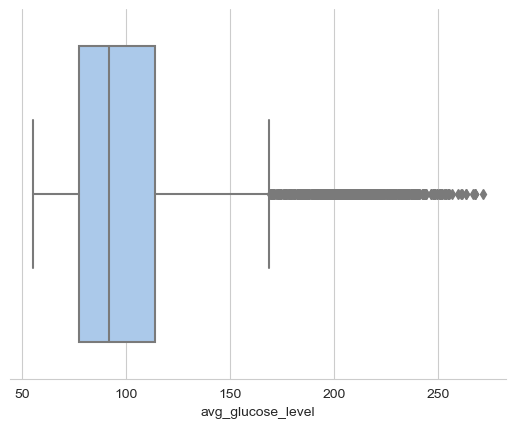

In [39]:
sns.boxplot(x='avg_glucose_level', data=df)
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.despine(left=True)

plt.show()

/var/folders/zt/7p4x8_1d2wdgdv8_dqk8gg080000gn/T/ipykernel_68149/3884200613.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df['num_cat'].cat.rename_categories(['No Stroke', 'Stroke'], inplace=True)


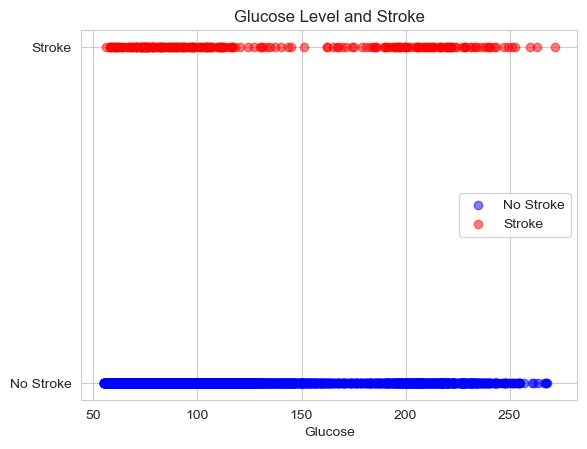

In [40]:
# Convert stroke variable to categorical
df['num_cat'] = df['stroke'].astype('category')
df['num_cat'].cat.rename_categories(['No Stroke', 'Stroke'], inplace=True)

# create separate dataframes for stroke and no stroke groups
df_stroke = df[df['num_cat'] == 'Stroke']
df_no_stroke = df[df['num_cat'] == 'No Stroke']

# plot dot plot for bmi with stroke and no stroke groups
plt.scatter(df_no_stroke['avg_glucose_level'], ['No Stroke']*len(df_no_stroke), color='blue', alpha=0.5, label='No Stroke')
plt.scatter(df_stroke['avg_glucose_level'], ['Stroke']*len(df_stroke), color='red', alpha=0.5, label='Stroke')

# set plot title, x-axis label and legend
plt.title('Glucose Level and Stroke')
plt.xlabel('Glucose')
plt.legend()

# show plot
plt.show()

- We group the average glucose level variable based on the stage of diabetes intervals and calculate the frequency of stroke within each group, along with the percentage of stroke occurrence.
- To visualize the impact of glucose level groups on stroke occurrence, we use line plots.

In [41]:
glucose_groups.value_counts()

(50, 100]     3131
(100, 150]    1248
(200, 250]     409
(150, 200]     296
(250, 300]      25
(0, 50]          0
Name: avg_glucose_level, dtype: int64

In [42]:
stroke_by_glucose = df[df['stroke'] == 1]['stroke'].groupby(glucose_groups).count()
stroke_by_glucose

avg_glucose_level
(0, 50]         0
(50, 100]     112
(100, 150]     47
(150, 200]     34
(200, 250]     51
(250, 300]      5
Name: stroke, dtype: int64

In [43]:
Pstroke_by_glucose = df[df['stroke'] == 1]['stroke'].groupby(glucose_groups).count() / df['stroke'].groupby(glucose_groups).count() * 100
Pstroke_by_glucose 

avg_glucose_level
(0, 50]             NaN
(50, 100]      3.577132
(100, 150]     3.766026
(150, 200]    11.486486
(200, 250]    12.469438
(250, 300]    20.000000
Name: stroke, dtype: float64

In [44]:
stroke_by_glucose.reset_index(drop = True)
stroke_by_glucose.index = ['~50', '51~100', '101~150', '151~200', '201~250', '251~300']

Pstroke_by_glucose .reset_index(drop = True)
Pstroke_by_glucose .index = ['~50', '51~100', '101~150', '151~200', '201~250', '251~300']

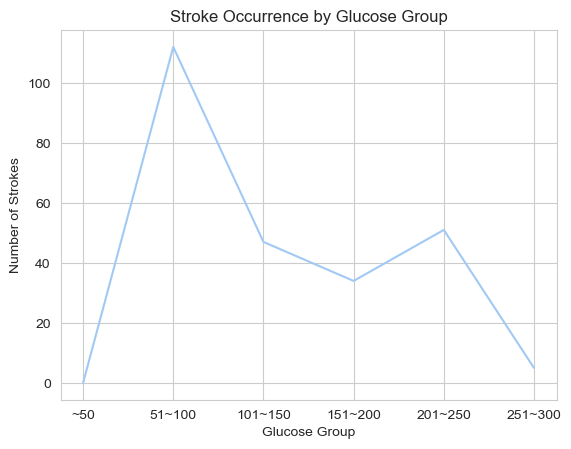

In [45]:
sns.lineplot(x = stroke_by_glucose.index, y = stroke_by_glucose.values)

plt.xlabel('Glucose Group')
plt.ylabel('Number of Strokes')
plt.title('Stroke Occurrence by Glucose Group')

plt.show()

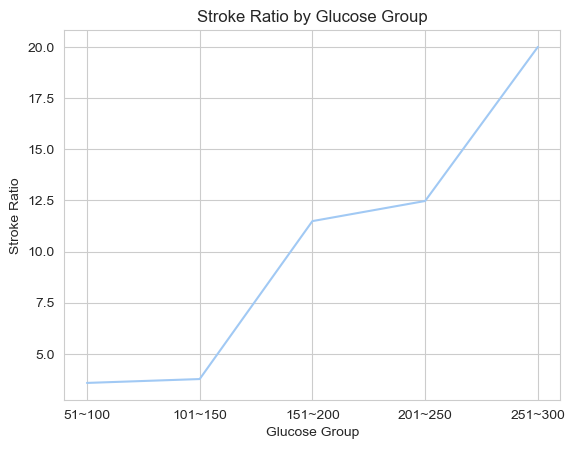

In [46]:
sns.lineplot(x = Pstroke_by_glucose.index, y = Pstroke_by_glucose.values)

plt.xlabel('Glucose Group')
plt.ylabel('Stroke Ratio')
plt.title('Stroke Ratio by Glucose Group')

plt.show()

- We have identified the average glucose level as a influential factor for stroke based on our analysis. 
- To make it easier to work with this feature, we create a new categorical feature called 'glucose_groups' based on the stage of diabetes intervals.

In [47]:
# Create a list of bin edges
glucose_groups = [0, 150, 200, 300]

# Use pd.cut to create a new column with age bins
df['glucose_groups'] = pd.cut(df['avg_glucose_level'], bins = glucose_groups, labels=['normal', 'pre_diabetes', 'diabetes']).astype(str)

- We repeat the same process we used for 'bmi' for other numerical variables. 
- This involves investigating their distribution and relationship with the stroke outcome using various plots. 
- As we do this for 'bmi', we also consult external sources to determine the relationship between bmi and obsesity.

##### bmi range
1) Healthy : 18.5 to 24.9,
2) Overweight: 25.0 to 29.9
3) Obese: 30.0

In [48]:
df['bmi'].max()

97.6

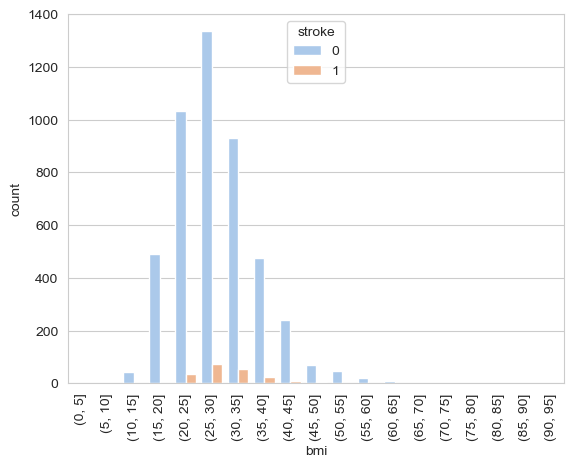

In [49]:
bmi_groups = pd.cut(df['bmi'], bins = range(0, 100, 5))

sns.countplot(x = bmi_groups, hue = 'stroke', data = df)
plt.xticks(rotation = 90)
plt.show()

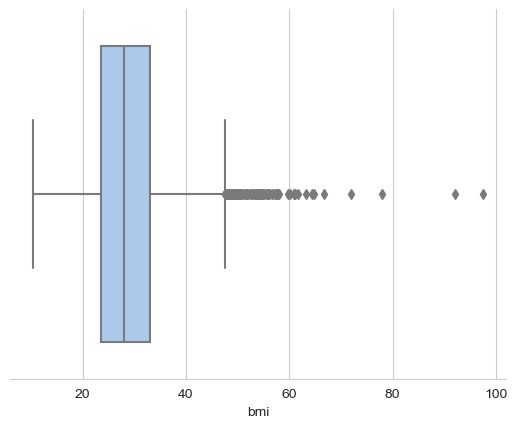

In [50]:
sns.boxplot(x='bmi', data=df)
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.despine(left=True)

plt.show()

/var/folders/zt/7p4x8_1d2wdgdv8_dqk8gg080000gn/T/ipykernel_68149/2354965805.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df['num_cat'].cat.rename_categories(['No Stroke', 'Stroke'], inplace=True)


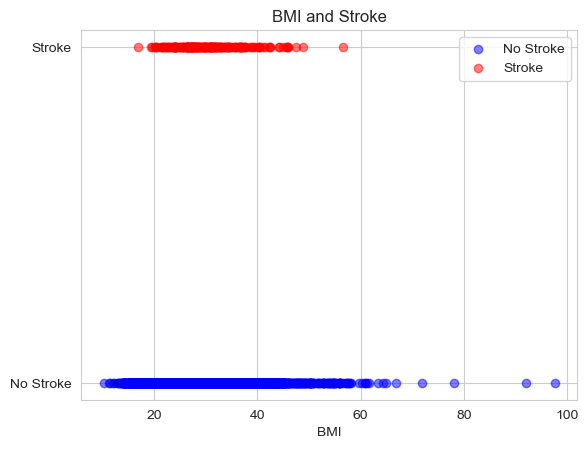

In [51]:
# Convert stroke variable to categorical
df['num_cat'] = df['stroke'].astype('category')
df['num_cat'].cat.rename_categories(['No Stroke', 'Stroke'], inplace=True)

# create separate dataframes for stroke and no stroke groups
df_stroke = df[df['num_cat'] == 'Stroke']
df_no_stroke = df[df['num_cat'] == 'No Stroke']

# plot dot plot for bmi with stroke and no stroke groups
plt.scatter(df_no_stroke['bmi'], ['No Stroke']*len(df_no_stroke), color='blue', alpha=0.5, label='No Stroke')
plt.scatter(df_stroke['bmi'], ['Stroke']*len(df_stroke), color='red', alpha=0.5, label='Stroke')

# set plot title, x-axis label and legend
plt.title('BMI and Stroke')
plt.xlabel('BMI')
plt.legend()

# show plot
plt.show()

- We group the bmi variable based on the stage of diabetes intervals and calculate the frequency of stroke within each group, along with the percentage of stroke occurrence.
- To visualize the impact of bmi groups on stroke occurrence, we use line plots.

In [52]:
bmi_groups.value_counts()

(25, 30]    1409
(20, 25]    1069
(30, 35]     985
(35, 40]     500
(15, 20]     493
(40, 45]     253
(45, 50]      76
(50, 55]      46
(10, 15]      44
(55, 60]      20
(60, 65]       8
(70, 75]       1
(75, 80]       1
(90, 95]       1
(65, 70]       1
(5, 10]        0
(80, 85]       0
(85, 90]       0
(0, 5]         0
Name: bmi, dtype: int64

- Before understanding the feature 'stroke', note that bmi has 201 null values out of 5110 observations. 

In [53]:
stroke_by_bmi = df[df['stroke'] == 1]['stroke'].groupby(bmi_groups).count()
stroke_by_bmi

bmi
(0, 5]       0
(5, 10]      0
(10, 15]     0
(15, 20]     3
(20, 25]    35
(25, 30]    75
(30, 35]    54
(35, 40]    24
(40, 45]    11
(45, 50]     6
(50, 55]     0
(55, 60]     1
(60, 65]     0
(65, 70]     0
(70, 75]     0
(75, 80]     0
(80, 85]     0
(85, 90]     0
(90, 95]     0
Name: stroke, dtype: int64

In [54]:
Pstroke_by_bmi = df[df['stroke'] == 1]['stroke'].groupby(bmi_groups).count() / df['stroke'].groupby(bmi_groups).count() * 100
Pstroke_by_bmi

bmi
(0, 5]           NaN
(5, 10]          NaN
(10, 15]    0.000000
(15, 20]    0.608519
(20, 25]    3.274088
(25, 30]    5.322924
(30, 35]    5.482234
(35, 40]    4.800000
(40, 45]    4.347826
(45, 50]    7.894737
(50, 55]    0.000000
(55, 60]    5.000000
(60, 65]    0.000000
(65, 70]    0.000000
(70, 75]    0.000000
(75, 80]    0.000000
(80, 85]         NaN
(85, 90]         NaN
(90, 95]    0.000000
Name: stroke, dtype: float64

In [55]:
stroke_by_bmi.reset_index(drop = True)
stroke_by_bmi.index = ['~5', '6~10', '11~15', '16~20', '21~25', '26~30', '31~35', '36~40', '41~45', '46~50', '51~55', '56~60', '61~65', '66~70', '71~75', '76~80', '81~85', '86~90', '91~95']

Pstroke_by_bmi.reset_index(drop = True)
Pstroke_by_bmi.index = ['~5', '6~10', '11~15', '16~20', '21~25', '26~30', '31~35', '36~40', '41~45', '46~50', '51~55', '56~60', '61~65', '66~70', '71~75', '76~80', '81~85', '86~90', '91~95']

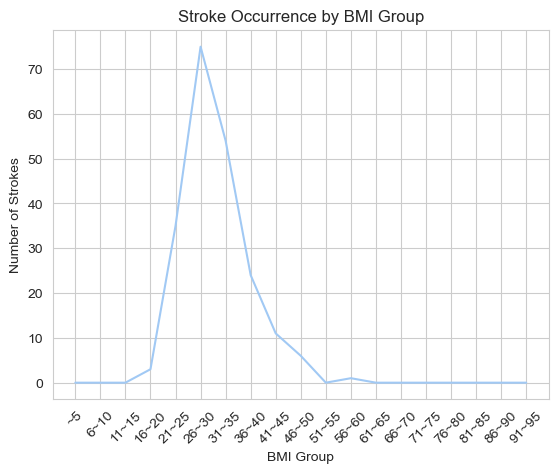

In [56]:
sns.lineplot(x = stroke_by_bmi.index, y = stroke_by_bmi.values)

plt.xlabel('BMI Group')
plt.xticks(rotation = 45)
plt.ylabel('Number of Strokes')
plt.title('Stroke Occurrence by BMI Group')

plt.show()

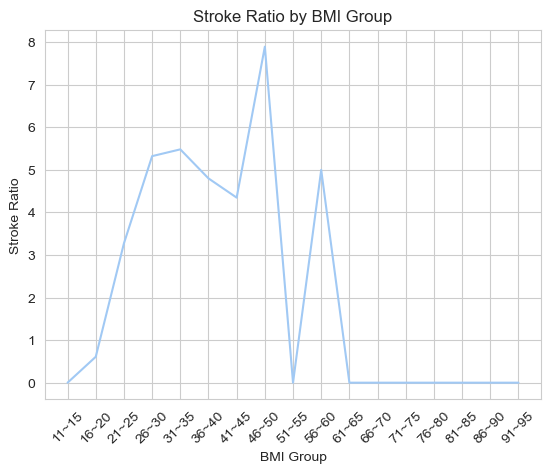

In [57]:
sns.lineplot(x = Pstroke_by_bmi.index, y = Pstroke_by_bmi.values)

plt.xlabel('BMI Group')
plt.xticks(rotation = 45)
plt.ylabel('Stroke Ratio')
plt.title('Stroke Ratio by BMI Group')

plt.show()

In [58]:
bmi_groups.value_counts()

(25, 30]    1409
(20, 25]    1069
(30, 35]     985
(35, 40]     500
(15, 20]     493
(40, 45]     253
(45, 50]      76
(50, 55]      46
(10, 15]      44
(55, 60]      20
(60, 65]       8
(70, 75]       1
(75, 80]       1
(90, 95]       1
(65, 70]       1
(5, 10]        0
(80, 85]       0
(85, 90]       0
(0, 5]         0
Name: bmi, dtype: int64

In [59]:
# We drop the artifical variable used for plotting the numerical variables
df = df.drop('num_cat', axis = 1)

#### 2.3.4. Plotting for Multiple Variable Comparison

##### 2.3.4.1. BMI and Age vs. Stroke
- Through our data exploration, we have identified that the combination of being overweight and older age may be a influential factor in the occurrence of stroke.

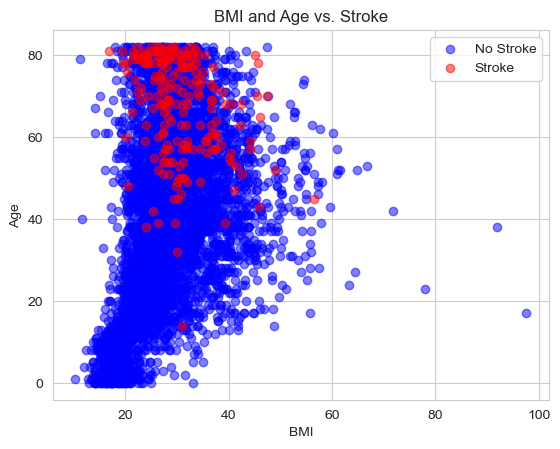

In [60]:
# create separate dataframes for stroke and no stroke groups
df_stroke = df[df['stroke'] == 1]
df_no_stroke = df[df['stroke'] == 0]

# plot scatter plot for bmi and age with stroke and no stroke groups
plt.scatter(df_no_stroke['bmi'], df_no_stroke['age'], color='blue', alpha=0.5, label='No Stroke')
plt.scatter(df_stroke['bmi'], df_stroke['age'], color='red', alpha=0.5, label='Stroke')

# set plot title, x-axis label, y-axis label, and legend
plt.title('BMI and Age vs. Stroke')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend()

# show plot
plt.show()

In [61]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_groups', 'glucose_groups'],
      dtype='object')

##### 2.3.4.2. Glucose Level and Age vs. Stroke

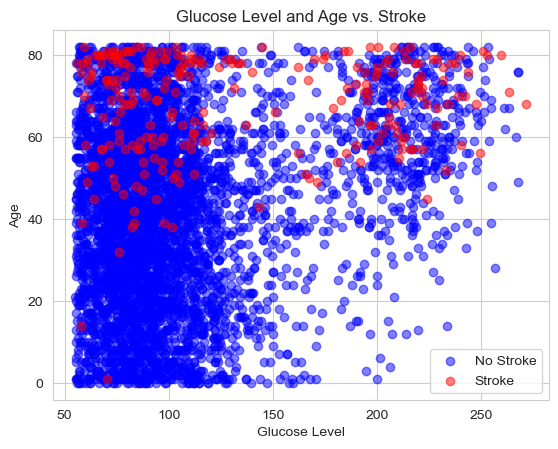

In [62]:
# create separate dataframes for stroke and no stroke groups
df_stroke = df[df['stroke'] == 1]
df_no_stroke = df[df['stroke'] == 0]

# plot scatter plot for bmi and age with stroke and no stroke groups
plt.scatter(df_no_stroke['avg_glucose_level'], df_no_stroke['age'], color='blue', alpha=0.5, label='No Stroke')
plt.scatter(df_stroke['avg_glucose_level'], df_stroke['age'], color='red', alpha=0.5, label='Stroke')

# set plot title, x-axis label, y-axis label, and legend
plt.title('Glucose Level and Age vs. Stroke')
plt.xlabel('Glucose Level')
plt.ylabel('Age')
plt.legend()

# show plot
plt.show()

##### 2.3.4.3. Glucose Level and BMI vs. Stroke

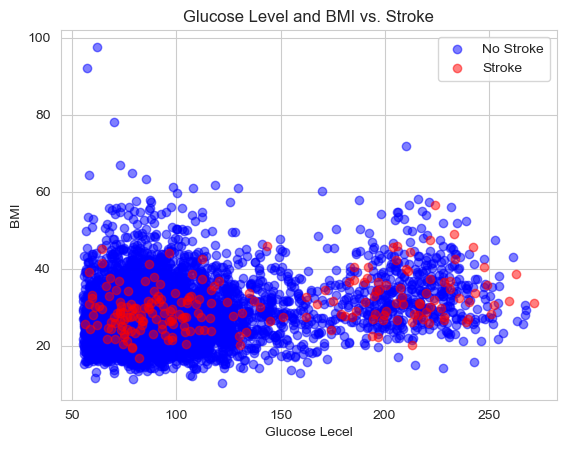

In [63]:
# create separate dataframes for stroke and no stroke groups
df_stroke = df[df['stroke'] == 1]
df_no_stroke = df[df['stroke'] == 0]

# plot scatter plot for bmi and age with stroke and no stroke groups
plt.scatter(df_no_stroke['avg_glucose_level'], df_no_stroke['bmi'], color='blue', alpha=0.5, label='No Stroke')
plt.scatter(df_stroke['avg_glucose_level'], df_stroke['bmi'], color='red', alpha=0.5, label='Stroke')

# set plot title, x-axis label, y-axis label, and legend
plt.title('Glucose Level and BMI vs. Stroke')
plt.xlabel('Glucose Lecel')
plt.ylabel('BMI')
plt.legend()

# show plot
plt.show()

##### 2.3.4.4. box plots for each combination of categorical and numerical variables
- The code below generates box plots for each combination of categorical and numerical variables, separated by the stroke outcome (stroke=1 or stroke=0).
- The resulting plots could help identify potential relationships between certain combinations of categorical and numerical variables with the occurrence of stroke.
- These plots allow for a visual comparison of the distribution of each numerical variable within each category, and how it differs between those who had a stroke and those who did not. The horizontal line in each plot represents the mean value of the numerical variable for that category and stroke group. 

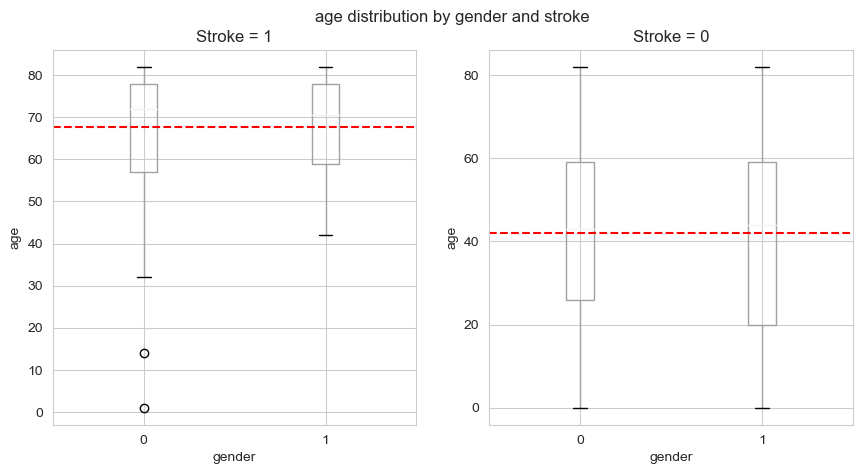

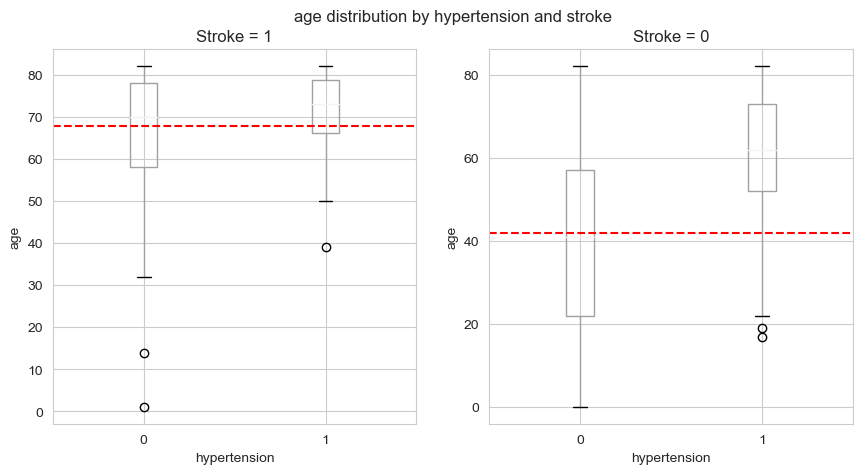

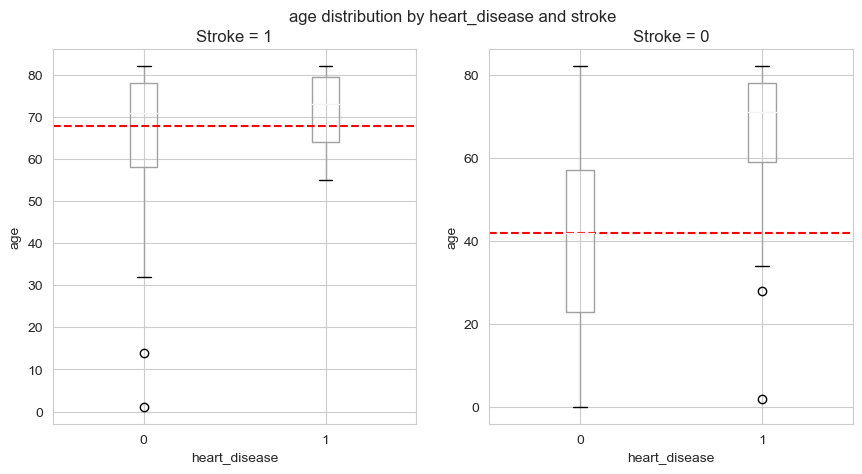

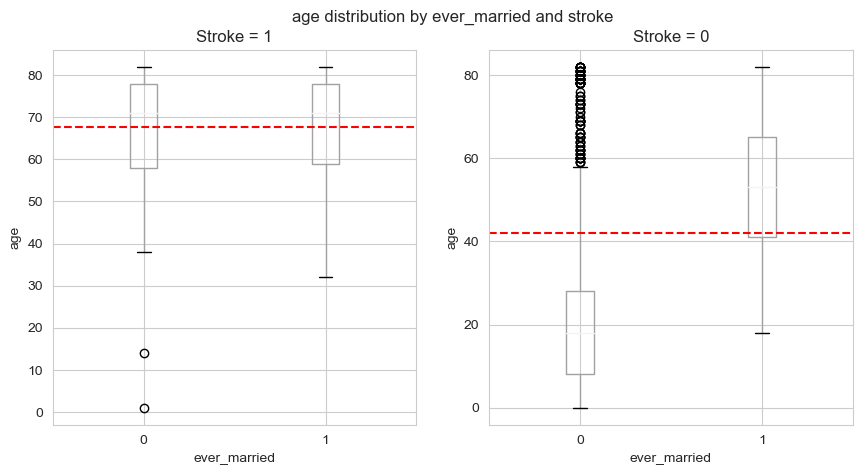

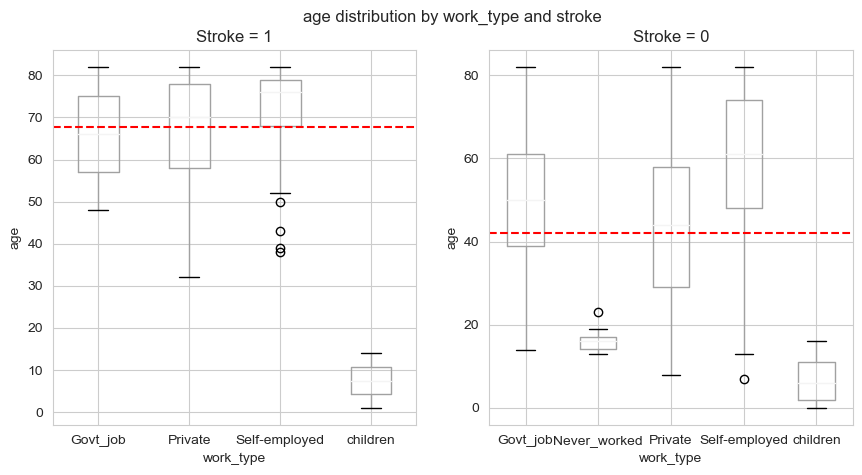

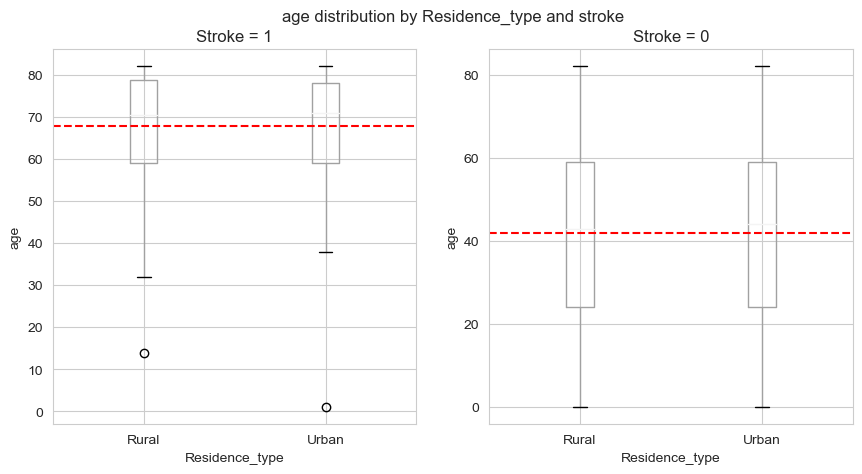

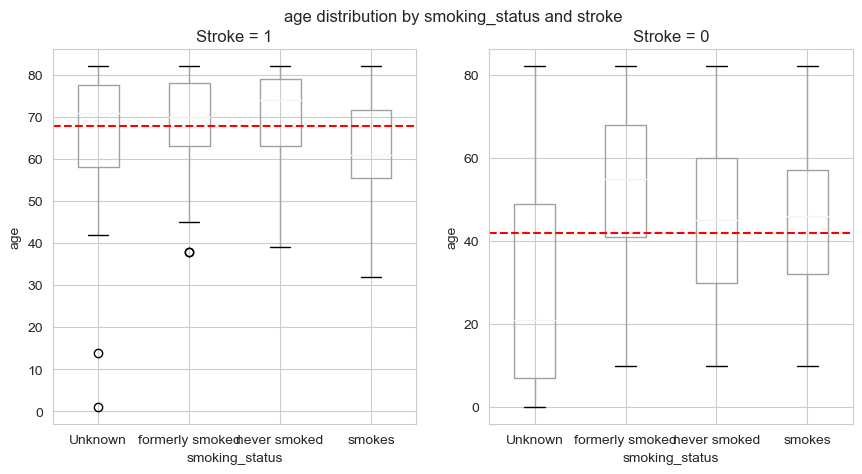

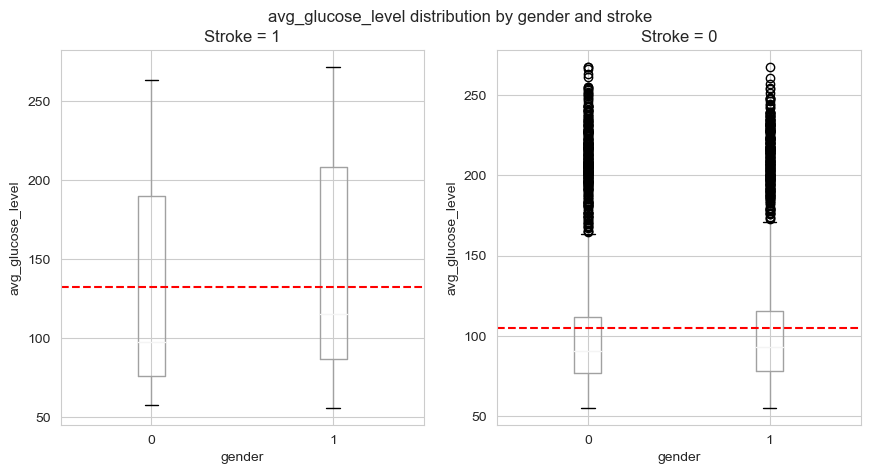

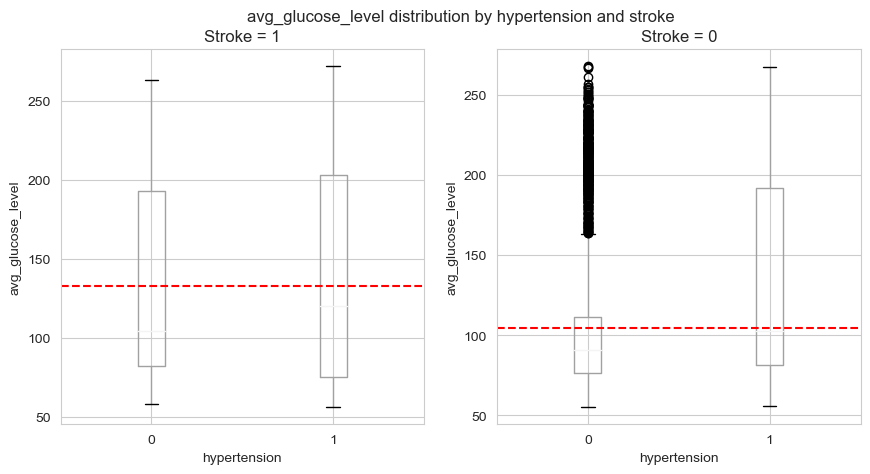

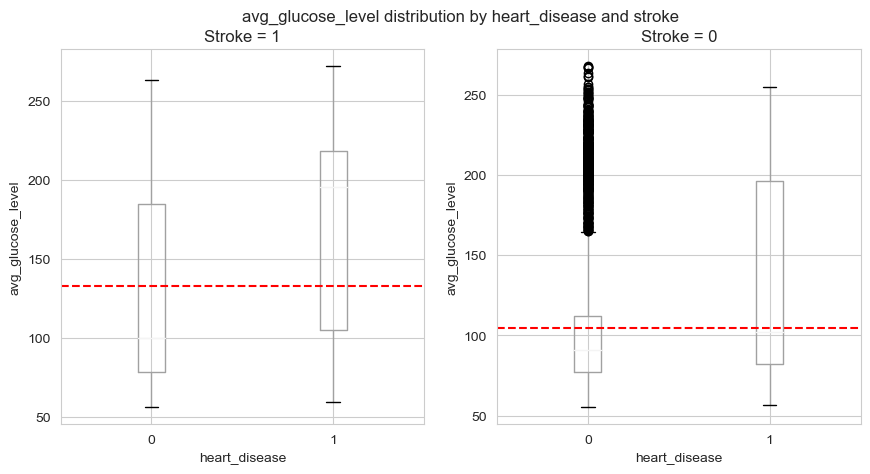

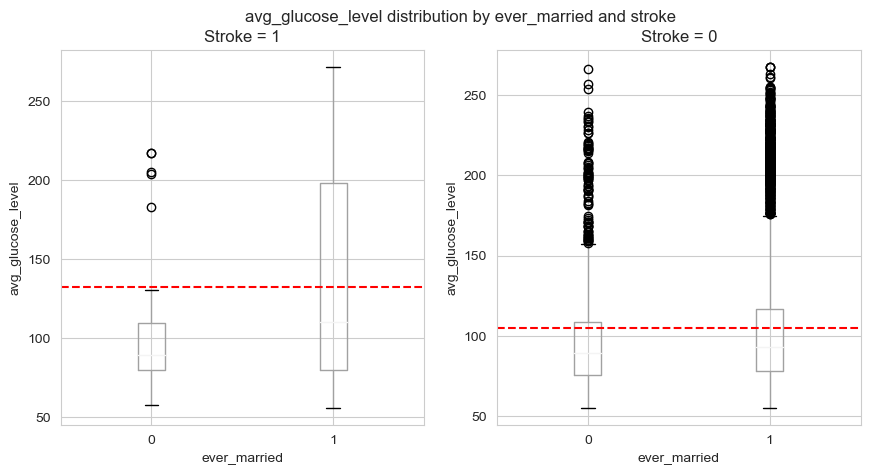

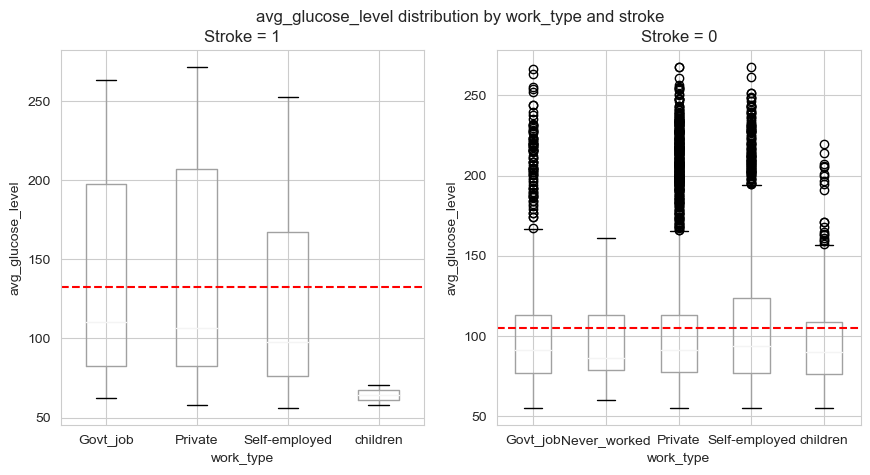

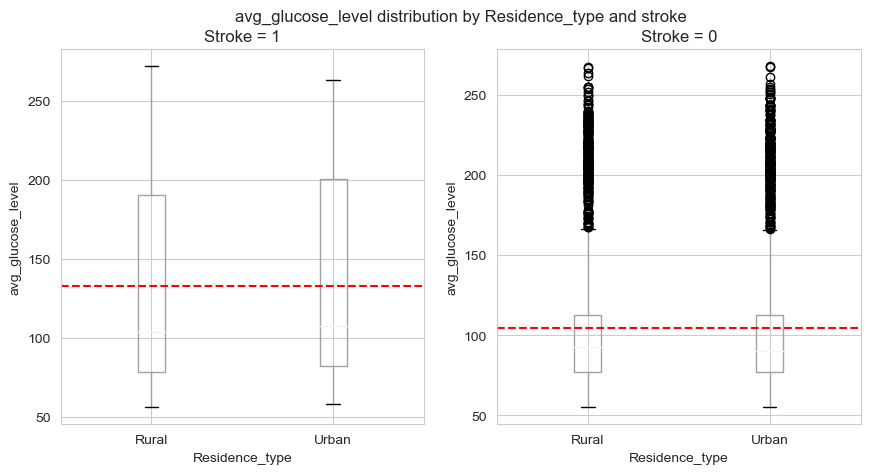

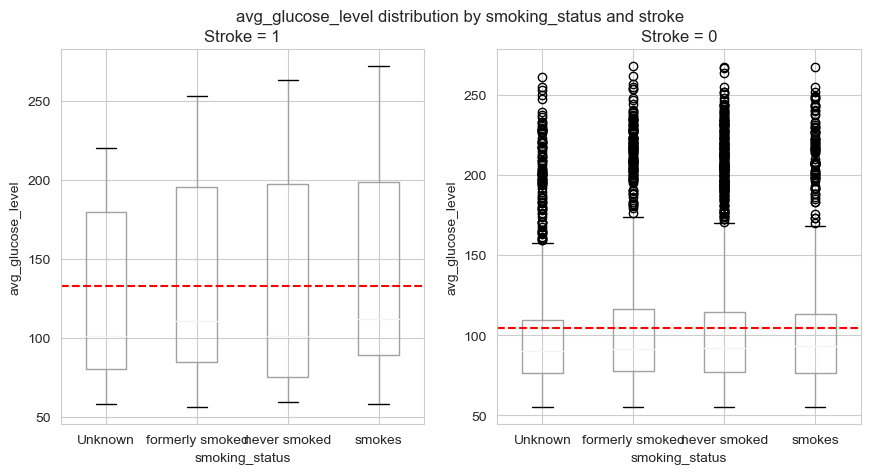

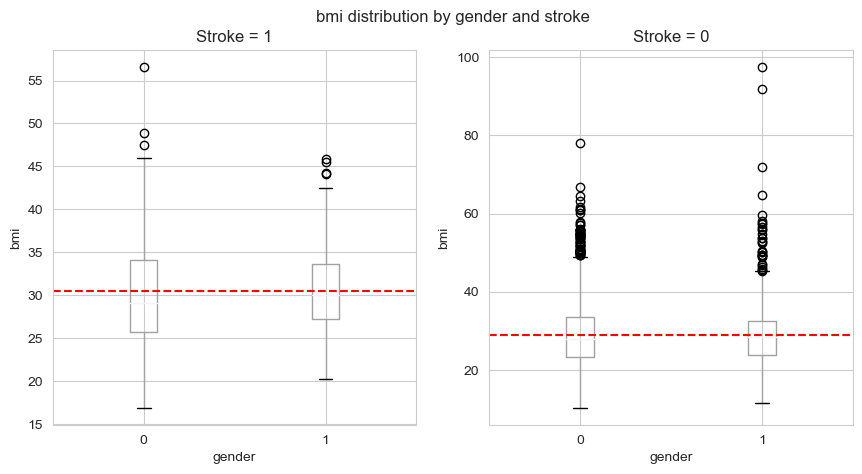

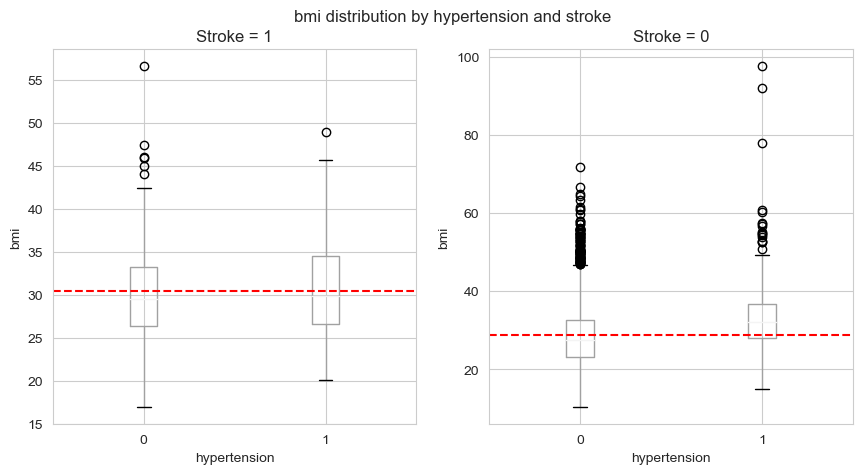

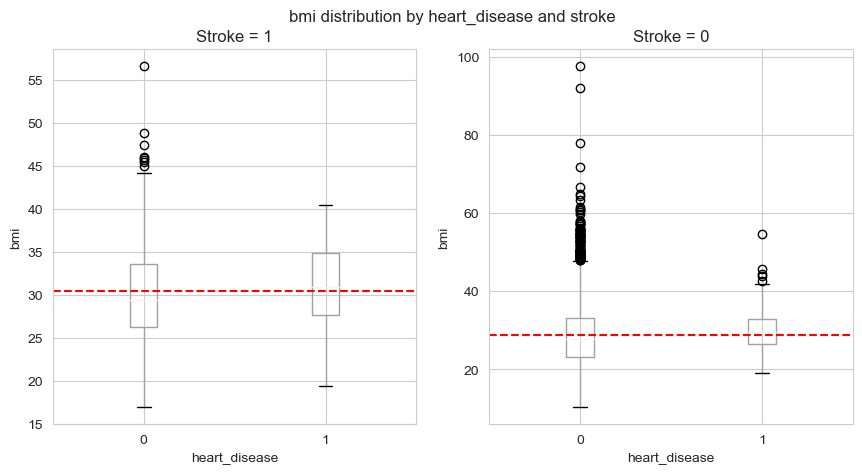

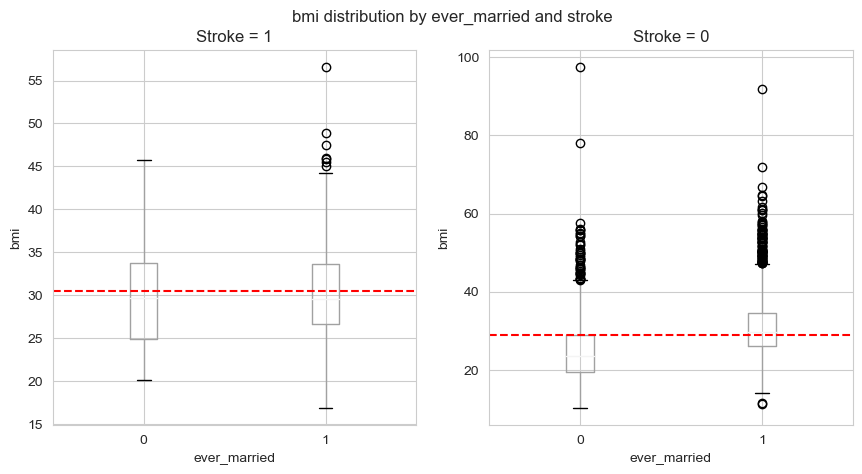

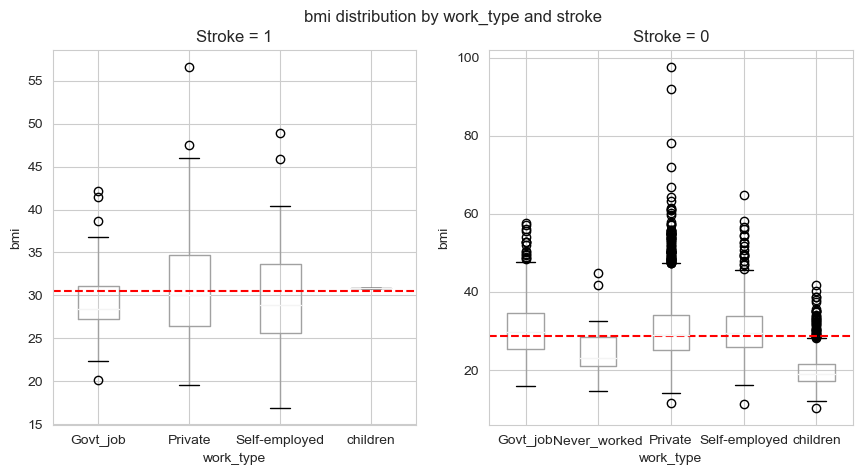

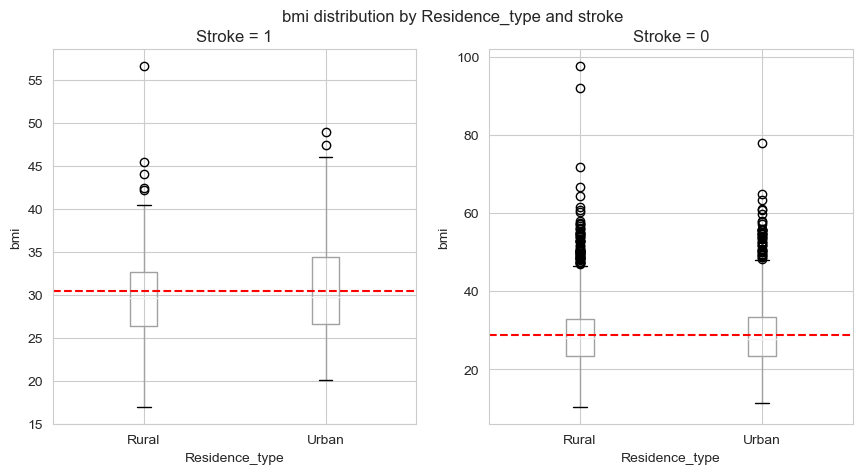

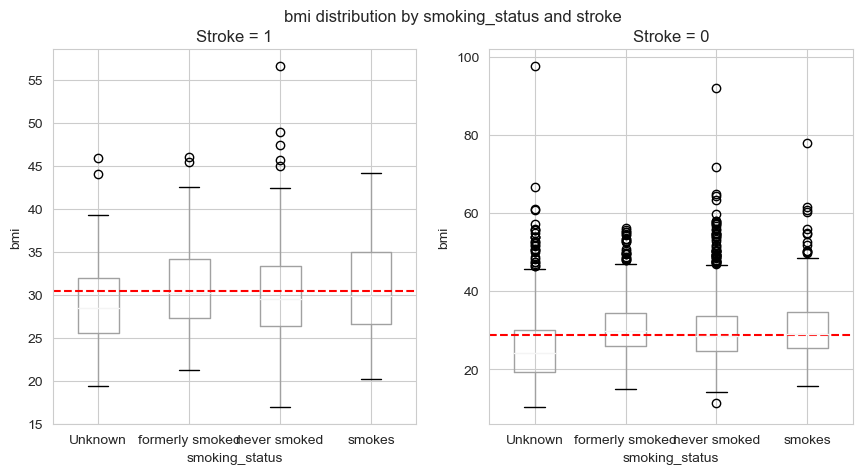

In [64]:
cat_pred = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
int_pred = ['age', 'avg_glucose_level', 'bmi']

for int_name in int_pred:
    for cat_name in cat_pred:

        # create a figure with two subplots
        fig, ax = plt.subplots(1, 2, figsize = (10,5))

        # create the box plots for stroke = 1 and stroke = 0
        df[df['stroke'] == 1].boxplot(column = int_name, by= cat_name, ax=ax[0])
        ax[0].axhline(df[df['stroke'] == 1][int_name].mean(), color='r', linestyle='--', label='Mean')
        ax[0].set_title('Stroke = 1')
        df[df['stroke'] == 0].boxplot(column = int_name, by = cat_name, ax=ax[1])
        ax[1].axhline(df[df['stroke'] == 0][int_name].mean(), color='r', linestyle='--', label='Mean')
        ax[1].set_title('Stroke = 0')

        # set the axis labels and title
        fig.suptitle(int_name + ' distribution by ' + cat_name + ' and stroke')
        ax[0].set_xlabel(cat_name)
        ax[0].set_ylabel(int_name)
        ax[1].set_xlabel(cat_name)
        ax[1].set_ylabel(int_name)

        plt.show()

##### 2.3.4.5. Plotting for a target variable

- In the final stage of our EDA, we note that our dataset is highly imbalanced. To improve our predictive performance and accuracy, we will need to upsample our data.
- Upsampling can help improve the performance of a machine learning model by reducing bias towards the majority class and improving its ability to correctly predict the minority class.

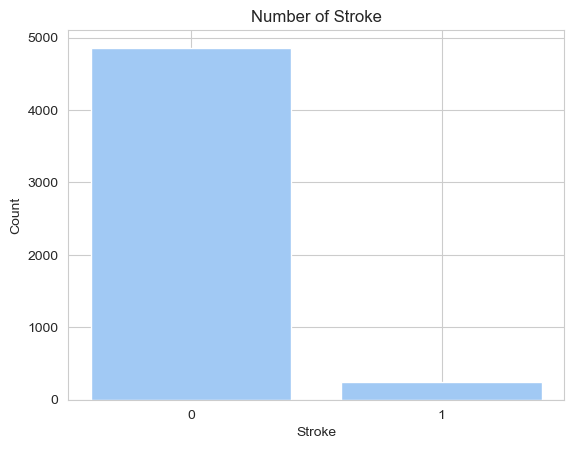

In [65]:
counts = df['stroke'].value_counts(ascending = False)

plt.bar(counts.index, counts.values)
plt.xticks([0,1])

plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Number of Stroke')

plt.show()

In [66]:
df['stroke'].value_counts(ascending = False)

0    4860
1     249
Name: stroke, dtype: int64

- The target variable of having a stroke is highly imbalanced, with only approximately 5% of the total stroke cases having occurred.

In [67]:
249 / (4860 + 249) * 100

4.873752201996477

## 3. Perform Feature Engineering

### 3.1. Handling Missing Data
- The feature 'bmi' contains null values, which account for approximately 4% of the data.
- To address this issue, we will use the .interpolate() function in Python to impute the missing values.
- Interpolation is a technique commonly used to estimate missing values in a data set or to smooth out small-scale variations in the data.

In [68]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
age_groups             0
glucose_groups         0
dtype: int64

In [69]:
201 / 5110 * 100

3.9334637964774952

In [70]:
df['bmi'].describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [71]:
# Only 4% of the bmi values are missing, so we interpolate the values
df['bmi'] = df['bmi'].interpolate()

In [72]:
df['bmi'].describe()

count    5109.000000
mean       28.928557
std         7.775535
min        10.300000
25%        23.600000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

- Now that we've imputed the null values for the BMI feature, we can move on to grouping the data. 
- We'll create a new feature called 'bmi_groups' based on obesity intervals.

In [73]:
# Healthy : 18.5 to 24.9,
# Overweight: 25.0 to 29.9
# BMI of 30.0 to 34.9: Class 1 obesity
# BMI of 35.0 to 39.9: Class 2 obesity
# BMI of 40.0 or higher: Class 3 obesity (also called "extreme" or "severe" obesity)

# Create a list of bin edges
bmi_groups = [0, 25, 30, 35, 40, 100]

# Use pd.cut to create a new column with age bins
df['bmi_groups'] = pd.cut(df['bmi'], bins = bmi_groups, labels=['healthy', 'overweight', 'class1_obesity', 'class2_obesity', 'severe_obesity']).astype(str)

In [74]:
cat_names = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_groups', 'glucose_groups', 'bmi_groups']
int_names = ['age', 'avg_glucose_level', 'bmi']
y = 'stroke'

### 3.2. Feature Selection
- To determine the most influential and relevant variables for our model, we evaluate the significance of each feature on stroke using different methods.
- For numerical features, we calculate their correlation with the target variable.
- For categorical features, we use the chi-squared test and p-values to determine their significance.
- Features that are found to be unimportant or irrelevant to the target variable will be dropped from the dataset.

#### 3.2.1. Heatmap for Numerical Features
- A heat map is a matrix that shows the correlation coefficients between each pair of numerical variables, where the color intensity represents the strength of the correlation.
- We observed that the correlation coefficients between each numerical feature and the target variable, stroke, are all below 0.25.
- This suggests that there is some degree of association between the numerical features and the target variable, but the associations are not strong enough to consider them highly correlated.
- The new grouped features we created previously based on these variables will be used instead in the analysis moving forward.

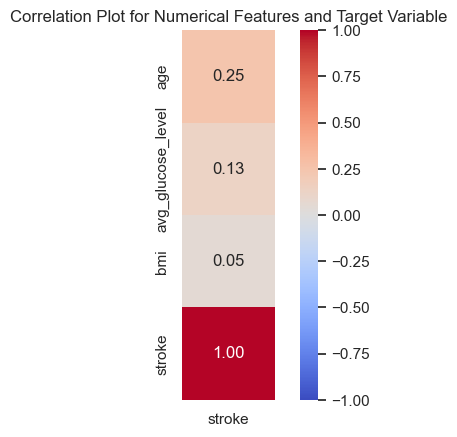

In [75]:
corr = df.corr()[['stroke']]

sns.set(font_scale = 1)
sns.heatmap(corr, annot = True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, fmt='.2f')
plt.title('Correlation Plot for Numerical Features and Target Variable')

plt.show()

#### 3.2.2. Chi-squared statistics
- In feature selection, chi-squared statistics and its p-value can be used to evaluate the significance of categorical variables. 
- The categorical variable with a lower p-value is considered more significant and is more likely to be included in the final model.
- Based on the results of our feature selection process, we have decided to drop the highly insignificant features, gender and residence_type, from our dataset. 

In [76]:
import scipy.stats as stats

# Perform chi-square test of independence for categorical features
for cat in cat_names:
    table = pd.crosstab(df[cat], df[y])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"{cat}: chi-square={chi2:.2f}, p-value={p:.4f}")

gender: chi-square=0.34, p-value=0.5598
hypertension: chi-square=81.57, p-value=0.0000
heart_disease: chi-square=90.23, p-value=0.0000
ever_married: chi-square=58.87, p-value=0.0000
work_type: chi-square=49.16, p-value=0.0000
Residence_type: chi-square=1.07, p-value=0.2998
smoking_status: chi-square=29.23, p-value=0.0000
age_groups: chi-square=389.92, p-value=0.0000
glucose_groups: chi-square=102.86, p-value=0.0000
bmi_groups: chi-square=30.48, p-value=0.0000


#### 3.2.3. One-Hot Encoding
- To prepare the selected features for our model, we performed one-hot encoding. This technique converts categorical variables into binary features, which allows the model to handle them as numerical inputs. With this step completed, we're ready to proceed to the modeling phase.
- We also separate the features and target variable to use the features to train the model and the target variable to evaluate the performance of the model.

In [77]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups,glucose_groups,bmi_groups
0,1,67,0,1,1,Private,Urban,228.69,36.60,formerly smoked,1,51~70,diabetes,class2_obesity
1,0,61,0,0,1,Self-employed,Rural,202.21,34.55,never smoked,1,51~70,diabetes,class1_obesity
2,1,80,0,1,1,Private,Rural,105.92,32.50,never smoked,1,71~80,normal,class1_obesity
3,0,49,0,0,1,Private,Urban,171.23,34.40,smokes,1,31-50,pre_diabetes,class1_obesity
4,0,79,1,0,1,Self-employed,Rural,174.12,24.00,never smoked,1,71~80,pre_diabetes,healthy


In [78]:
dummies = ['work_type', 'Residence_type', 'smoking_status', 'age_groups', 'glucose_groups', 'bmi_groups']

X = df.drop('stroke', axis = 1)
X = pd.get_dummies(X, columns = dummies, prefix = dummies)
y = df['stroke']

In [79]:
'stroke' in X.columns

False

#### 3.2.4. Data Visualization with Dimensionality Reduction
- PCA and t-SNE are useful tools for data visualization and exploratory data analysis, allowing us to gain a better understanding of the structure and relationships in high-dimensional datasets.
- We can see distinct clusters for the target variable "stroke = yes(1)" in the PCA and t-SNE plots. It means that there are certain patterns in the data that are associated with the occurrence of stroke. 

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


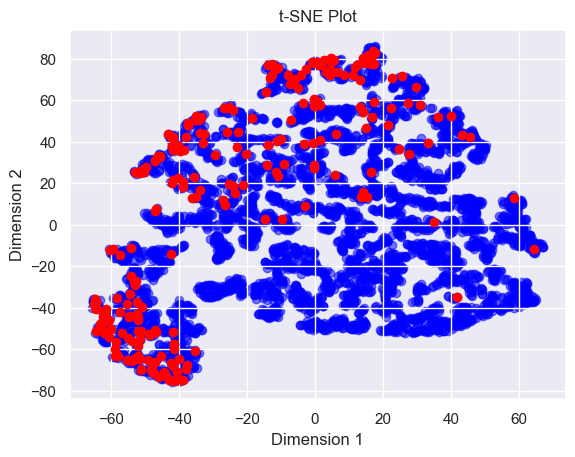

In [80]:
# Extract the features and target variable
X = df.drop('stroke', axis = 1)
X = pd.get_dummies(X, columns = dummies, prefix = dummies)
y = df['stroke']

# Initialize t-SNE with two components
tsne = TSNE(n_components=2)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE visualization with color-coded labels
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
# plt.show()

# Define a color mapping dictionary
color_map = {0: 'blue', 1: 'red'}

# Plot the t-SNE visualization with color-coded labels using the color map
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.map(color_map))

X_blue = X_tsne[y == 0]
X_red = X_tsne[y == 1]

# Plot the blue points first with low z-order value
plt.scatter(X_blue[:, 0], X_blue[:, 1], c='blue', alpha=0.5, zorder=0)
# Plot the red points on top with high z-order value
plt.scatter(X_red[:, 0], X_red[:, 1], c='red', alpha=1.0, zorder=1)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Plot')
           
plt.savefig('tsne.png')
plt.show()

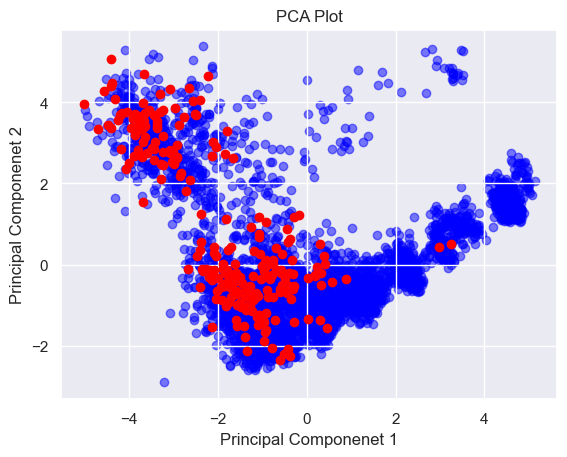

In [81]:
X = df.drop('stroke', axis = 1)
X = pd.get_dummies(X, columns = dummies, prefix = dummies)
y = df['stroke']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
# plt.show()

# Define a color mapping dictionary
color_map = {0: 'blue', 1: 'red'}

# Plot the PCA visualization with color-coded labels using the color map
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.map(color_map))

# Separate the blue and red points
X_blue = X_pca[y == 0]
X_red = X_pca[y == 1]

# Plot the blue points first with low z-order value
plt.scatter(X_blue[:, 0], X_blue[:, 1], c='blue', alpha=0.5, zorder=0)
# Plot the red points on top with high z-order value
plt.scatter(X_red[:, 0], X_red[:, 1], c='red', alpha=1.0, zorder=1)

plt.xlabel('Principal Componenet 1')
plt.ylabel('Principal Componenet 2')
plt.title('PCA Plot')
           
plt.savefig('pca.png')
plt.show()

#### 3.2.5. Final Features
- After analyzing the correlation and significance of each feature, we selected the following eight features from 11 original features for our model: age, hypertension, heart_disease, ever_married, work_type, smoking_status, bmi_groups, glucose_groups
- We dropped gender and Residence_type due to their low significance. We also removed the original numerical features that we binned into groups.
- Using these final features, we will build a classifier model to predict whether to have a stroke or not.

In [82]:
df = df.drop(columns=['gender', 'Residence_type', 'age', 'avg_glucose_level', 'bmi'])
df.columns

Index(['hypertension', 'heart_disease', 'ever_married', 'work_type',
       'smoking_status', 'stroke', 'age_groups', 'glucose_groups',
       'bmi_groups'],
      dtype='object')

In [83]:
cat_names = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status', 'age_groups', 'glucose_groups', 'bmi_groups']
# int_names = ['age', 'avg_glucose_level', 'bmi']
y = 'stroke'

In [84]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,age_groups_81~90,age_groups_nan,glucose_groups_diabetes,glucose_groups_normal,glucose_groups_pre_diabetes,bmi_groups_class1_obesity,bmi_groups_class2_obesity,bmi_groups_healthy,bmi_groups_overweight,bmi_groups_severe_obesity
0,1,67,0,1,1,228.69,36.60,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,0,61,0,0,1,202.21,34.55,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,80,0,1,1,105.92,32.50,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,49,0,0,1,171.23,34.40,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,0,79,1,0,1,174.12,24.00,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## 4. Optimizing Performance and Selecting the Best Model

### 4.1. Split Data into Train and Test sets
- We split our data into two parts: a training set and a testing set. 
- We use the training set to train our model, and then use the testing set to evaluate its performance. 
- By comparing the model's predictions on the testing set to the actual outcomes, we can get an estimate of how well our model will perform on new, unseen data.

In [85]:
# Perfrom one-hot encoding for categorical variables for further analysis 
dummies = ['work_type', 'smoking_status', 'age_groups', 'glucose_groups', 'bmi_groups']

X = df.drop('stroke', axis = 1)
X = pd.get_dummies(X, columns = dummies, prefix = dummies)
y = df['stroke']

In [86]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

### 4.2. Train and Evaluate Machine Learning Models
- Models: Logistic Regression, Support Vector Machines, K-Nearest Neighbors, Decision Trees, Random Forests, Naive Bayes, Perceptron, Linear Support Vector Classification, and Stochastic Gradient Descent
- The table shows the accuracy scores of different classification models on the test set.
- Several models show high performance and score same. We choose one from binary model (Logistic Regression) and the other from tree_base model (Random Forest) and will compare the performance.

In [87]:
import warnings
warnings.filterwarnings("ignore")

models = [LogisticRegression, SVC, LinearSVC, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, Perceptron, SGDClassifier]
model_names = ['Logistic_Regression', 'Support_Vector_Machines', 'Linear_SVC', 
              'KNN', 'Decision_Tree', 'Random_Forest', 'Naive_Bayes', 
              'Perceptron', 'Stochastic_Gradient_Decent']
scores = []

for i, model in enumerate(models):
    classifier = model()
    classifier.fit(train_X, train_y)
    acc = round(classifier.score(test_X, test_y)*100, 2)
    scores.append(acc)
    
table = pd.DataFrame({'Model': model_names, 'Score': scores}).sort_values(by='Score', ascending=False)
table

,Model,Score
0,Logistic_Regression,93.74
1,Support_Vector_Machines,93.74
2,Linear_SVC,93.74
3,KNN,93.74
7,Perceptron,93.74
8,Stochastic_Gradient_Decent,93.74
5,Random_Forest,92.80
4,Decision_Tree,92.02
6,Naive_Bayes,36.07


### 4.3. Logistic Regression
#### 4.3.1. Confusion Matrix
- A confusion matrix is created to see how well the model is performing in terms of accuracy, precision, recall, and F1 score. It is a useful tool to evaluate the model's performance and identify areas for improvement.

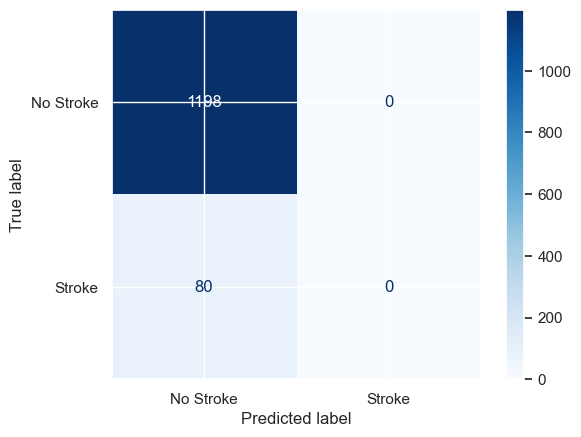

In [88]:
model = LogisticRegression()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

cm = confusion_matrix(test_y, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

cmap = plt.get_cmap('Blues')
disp.plot(cmap=cmap)

plt.show()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y, target_names=['No Stroke', 'Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.94      1.00      0.97      1198
      Stroke       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



#### 4.3.2. Cross Validation
- Using cross-validation helps to reduce overfitting and provides a more robust estimate of the model's performance. 
- The cross-validation score is reported as an average accuracy.
- The function splits the data into cv equally sized folds, and then trains and evaluates the model cv times. For each fold, the function returns a score representing the performance of the model on the held-out data.

In [90]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation on the model
scores = cross_val_score(model, X, y, cv = 10)

# Print the mean and standard deviation of the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())
print('Standard deviation:', scores.std())

Cross-validation scores: [0.95107632 0.95107632 0.95107632 0.95107632 0.95107632 0.95107632
 0.95107632 0.95107632 0.95107632 0.95294118]
Mean score: 0.95126280649246
Standard deviation: 0.0005594566593760785


### 4.4. Random Forest
#### 4.4.1. Confusion Matrix

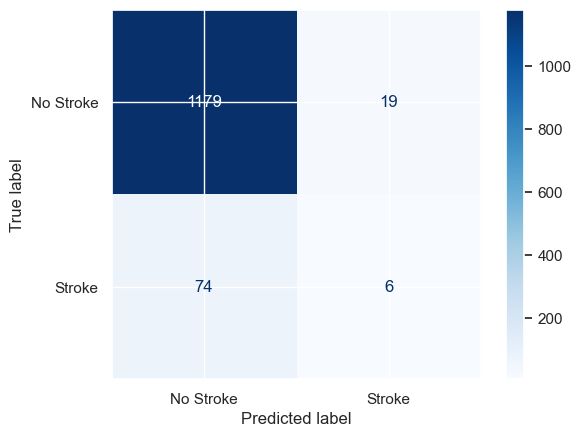

In [91]:
model = RandomForestClassifier()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

cm = confusion_matrix(test_y, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

cmap = plt.get_cmap('Blues')
disp.plot(cmap=cmap)

plt.savefig('confusion_matrix_rf.png')
plt.show()

In [92]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y, target_names=['No Stroke', 'Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.94      0.98      0.96      1198
      Stroke       0.24      0.07      0.11        80

    accuracy                           0.93      1278
   macro avg       0.59      0.53      0.54      1278
weighted avg       0.90      0.93      0.91      1278



#### 4.4.2. Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation on the model
scores = cross_val_score(model, X, y, cv = 10)

# Print the mean and standard deviation of the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())
print('Standard deviation:', scores.std())

Cross-validation scores: [0.92759295 0.93737769 0.94911937 0.94520548 0.94520548 0.94911937
 0.93933464 0.94520548 0.94324853 0.93921569]
Mean score: 0.9420624688231458
Standard deviation: 0.006144113579486565


### 4.5. ROC_AUC Curve
- We can compare the performance between logistic regression and random forest based on their ROC-AUC curves and choose the model with the highest AUC.
- The curves plot the true positive rate (sensitivity) against the false positive rate (1-specificity) for different classification thresholds.
- A bigger area under the ROC curve (AUC) of logistic regression model indicates a better model performance in distinguishing between the positive and negative classes.

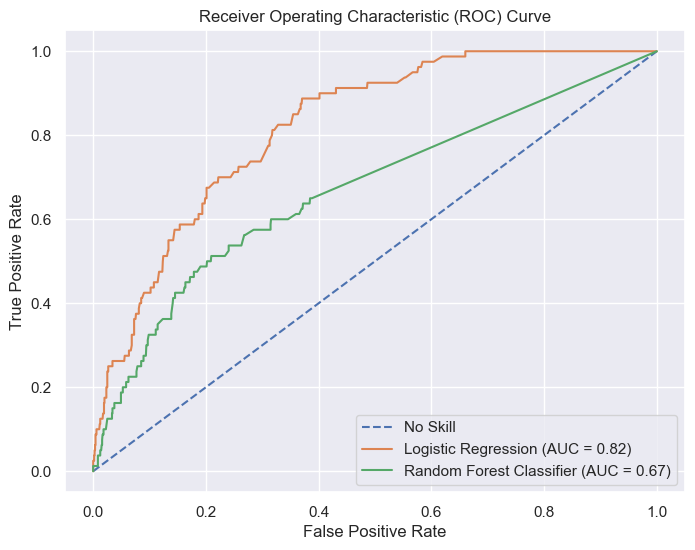

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score

logi = LogisticRegression()
logi.fit(train_X, train_y)
pred_y_logi = model.predict(test_X)

rf = RandomForestClassifier()
rf.fit(train_X, train_y)
pred_y_rf = model.predict(test_X)

# Logistic Regression
logreg_probs = logi.predict_proba(test_X)[:, 1]
logreg_fpr, logreg_tpr, _ = roc_curve(test_y, logreg_probs)
logreg_auc = roc_auc_score(test_y, logreg_probs)

# Random Forest Classifier
rf_probs = rf.predict_proba(test_X)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_probs)
rf_auc = roc_auc_score(test_y, rf_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)

# Set plot title, axis labels, and legend
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show plot
plt.show()

## 5. Dealing with Class Imbalance: Upsampling the Minority Class

- The random_forest model shows high predictive performance and also not too overfitted while learning. 
- However, as we mentioned earlier, the original data set is highly imbalanced, we we have a doubt its performance whether to predict 'stroke' case accurately due to its minority.
- We try upsample through SMOTE.

In [95]:
X = df.drop('stroke', axis = 1)
X = pd.get_dummies(X, columns = dummies, prefix = dummies)
y = df['stroke']

In [96]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

### 5.1. SMOTE
- SMOTE is an upsampling technique that creates new synthetic samples in the minority class by creating new samples that are combinations of the existing minority class samples.
- We set the sampling_strategy parameter to 0.4, which means the desired number of minority class samples is 40% of the number of majority class samples after resampling.
- When using SMOTE to upsample the minority class, it is important to only apply the technique to the training set and not the test set. This is because SMOTE is a form of data augmentation that creates synthetic samples by interpolating between existing samples. 
- In the original data set, the stroke cases only accounted for 5% of the target variable. However, after upsampling with SMOTE, the proportion of stroke cases in the training set increased to approximately 30%.

In [97]:
df['stroke'].value_counts(ascending = False)

0    4860
1     249
Name: stroke, dtype: int64

In [98]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.4, random_state=123)
train_X_smote, train_y_smote = smote.fit_resample(train_X, train_y) # only apply the technique to the training set and not the test set

In [99]:
smote_counts = train_y_smote.value_counts(ascending = False)
smote_counts

0    3662
1    1464
Name: stroke, dtype: int64

In [100]:
1464 / (3662 + 1464)

0.28560280920795944

- We plot the data to visualize the effect of the upsampling. 
- The plot shows that the number of samples in the minority class has increased, making the classes more balanced.

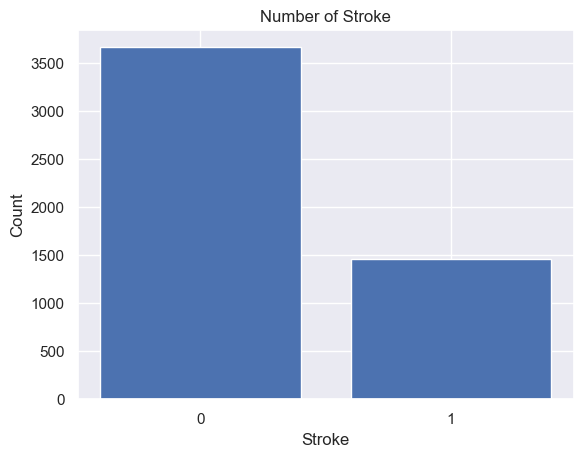

In [101]:
plt.bar(smote_counts.index, smote_counts.values)
plt.xticks([0,1])

plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Number of Stroke')

plt.show()

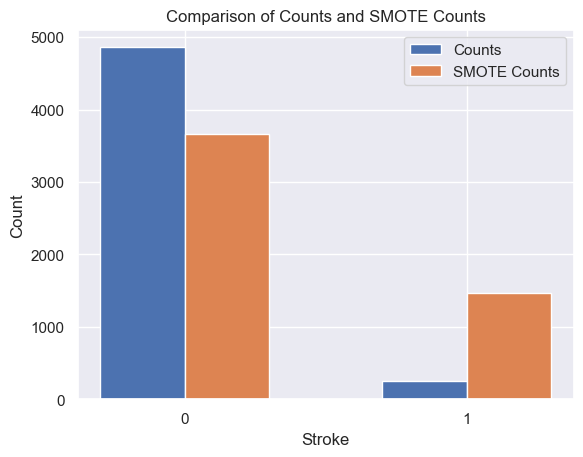

In [102]:
fig, ax = plt.subplots()

width = 0.3

ax.bar(np.arange(len(counts)), counts.values, width=width, label='Counts')
ax.bar(np.arange(len(smote_counts))+width, smote_counts.values, width=width, label='SMOTE Counts')

ax.set_xticks(np.arange(len(counts))+width/2)
ax.set_xticklabels(counts.index)

ax.set_xlabel('Stroke')
ax.set_ylabel('Count')
ax.set_title('Comparison of Counts and SMOTE Counts')
ax.legend()

plt.show()

### 5.2. Model Training with SMOTE Upsampled Data
- We compare various classifier models with the upsampled data set.
- We use the same models as before, trained on the original data, and evaluated their performance through cross-validation.
- The predictive performance improve (+0.16) significantly for identifying 'stroke' cases.
- With these results, we complete the building of our stroke prediction model.

In [103]:
import warnings
warnings.filterwarnings("ignore")

models = [LogisticRegression, SVC, LinearSVC, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, Perceptron, SGDClassifier]
model_names = ['Logistic_Regression', 'Support_Vector_Machines', 'Linear_SVC', 
              'KNN', 'Decision_Tree', 'Random_Forest', 'Naive_Bayes', 
              'Perceptron', 'Stochastic_Gradient_Decent']
scores = []

for i, model in enumerate(models):
    classifier = model()
    classifier.fit(train_X_smote, train_y_smote)
    acc = round(classifier.score(test_X, test_y)*100, 2)
    scores.append(acc)
    
table = pd.DataFrame({'Model': model_names, 'Score': scores}).sort_values(by='Score', ascending=False)
table

,Model,Score
0,Logistic_Regression,93.90
2,Linear_SVC,93.74
8,Stochastic_Gradient_Decent,93.74
1,Support_Vector_Machines,93.58
7,Perceptron,93.43
5,Random_Forest,92.10
4,Decision_Tree,91.31
3,KNN,89.20
6,Naive_Bayes,36.15


### 5.3. Logistic Regression after SMOTE
#### 5.3.1. Confusion Matrix

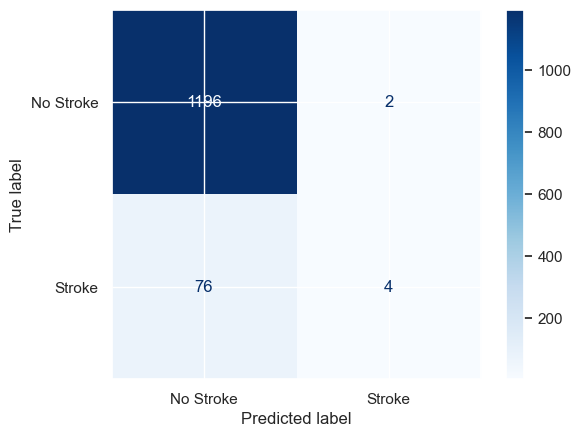

In [104]:
# Train the random forest model on the upsampled training set
model = LogisticRegression()
model.fit(train_X_smote, train_y_smote)

# Evaluate the model on the original testing set
pred_y = model.predict(test_X)
cm = confusion_matrix(test_y, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

cmap = plt.get_cmap('Blues')
disp.plot(cmap=cmap)

plt.show()

In [105]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y, target_names=['No Stroke', 'Stroke']))

# Precision is a measure of how accurate the positive predictions of the model are, and is defined as the number of true positives divided by the total number of positive predictions (true positives plus false positives).
# Recall is a measure of how complete the model's positive predictions are, and is defined as the number of true positives divided by the total number of actual positives (true positives plus false negatives).
# The F1 score is the harmonic mean of precision and recall, and it ranges from 0 to 1, with higher values indicating better performance. The F1 score provides a way to balance the trade-off between precision and recall, and is often used when both precision and recall are important for a particular problem.

              precision    recall  f1-score   support

   No Stroke       0.94      1.00      0.97      1198
      Stroke       0.67      0.05      0.09        80

    accuracy                           0.94      1278
   macro avg       0.80      0.52      0.53      1278
weighted avg       0.92      0.94      0.91      1278



#### 5.3.2. Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation on the model
scores = cross_val_score(model, X, y, cv = 10)

# Print the mean and standard deviation of the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())
print('Standard deviation:', scores.std())

Cross-validation scores: [0.95107632 0.95107632 0.95107632 0.95107632 0.95107632 0.95107632
 0.95107632 0.95107632 0.95107632 0.95294118]
Mean score: 0.95126280649246
Standard deviation: 0.0005594566593760785


#### 5.3.3. Coefficients
- A positive coefficient indicates a positive association between the independent variable and the dependent variable, while a negative coefficient indicates a negative association. 
- The magnitude of the coefficient indicates the strength of the association.

In [107]:
coefficients = model.coef_

# Print the feature coefficients
for feature_name, coefficient in zip(test_X.columns, coefficients[0]):
    print(f'{feature_name}: {coefficient}')

hypertension: 0.40319577713868937
heart_disease: 0.11252842324099926
ever_married: -0.21320805282606498
work_type_Govt_job: -4.009552116411274
work_type_Never_worked: -1.2168077340252776
work_type_Private: -3.2884820086306332
work_type_Self-employed: -3.7897802200060338
work_type_children: -3.495182524001869
smoking_status_Unknown: -4.327210988240151
smoking_status_formerly smoked: -4.172449036570549
smoking_status_never smoked: -4.324768368849322
smoking_status_smokes: -4.015819328081963
age_groups_0-30: -6.622232536970119
age_groups_31-50: -5.002205931396058
age_groups_51~70: -3.4457564136609493
age_groups_71~80: -2.3234619244407533
age_groups_81~90: -2.5434635845044586
age_groups_nan: -3.658032151981509
glucose_groups_diabetes: -3.646554211892221
glucose_groups_normal: -3.7184880942987593
glucose_groups_pre_diabetes: -3.3721412784161915
bmi_groups_class1_obesity: -3.6536738420078962
bmi_groups_class2_obesity: -4.2476380540357965
bmi_groups_healthy: -3.870895215693591
bmi_groups_over

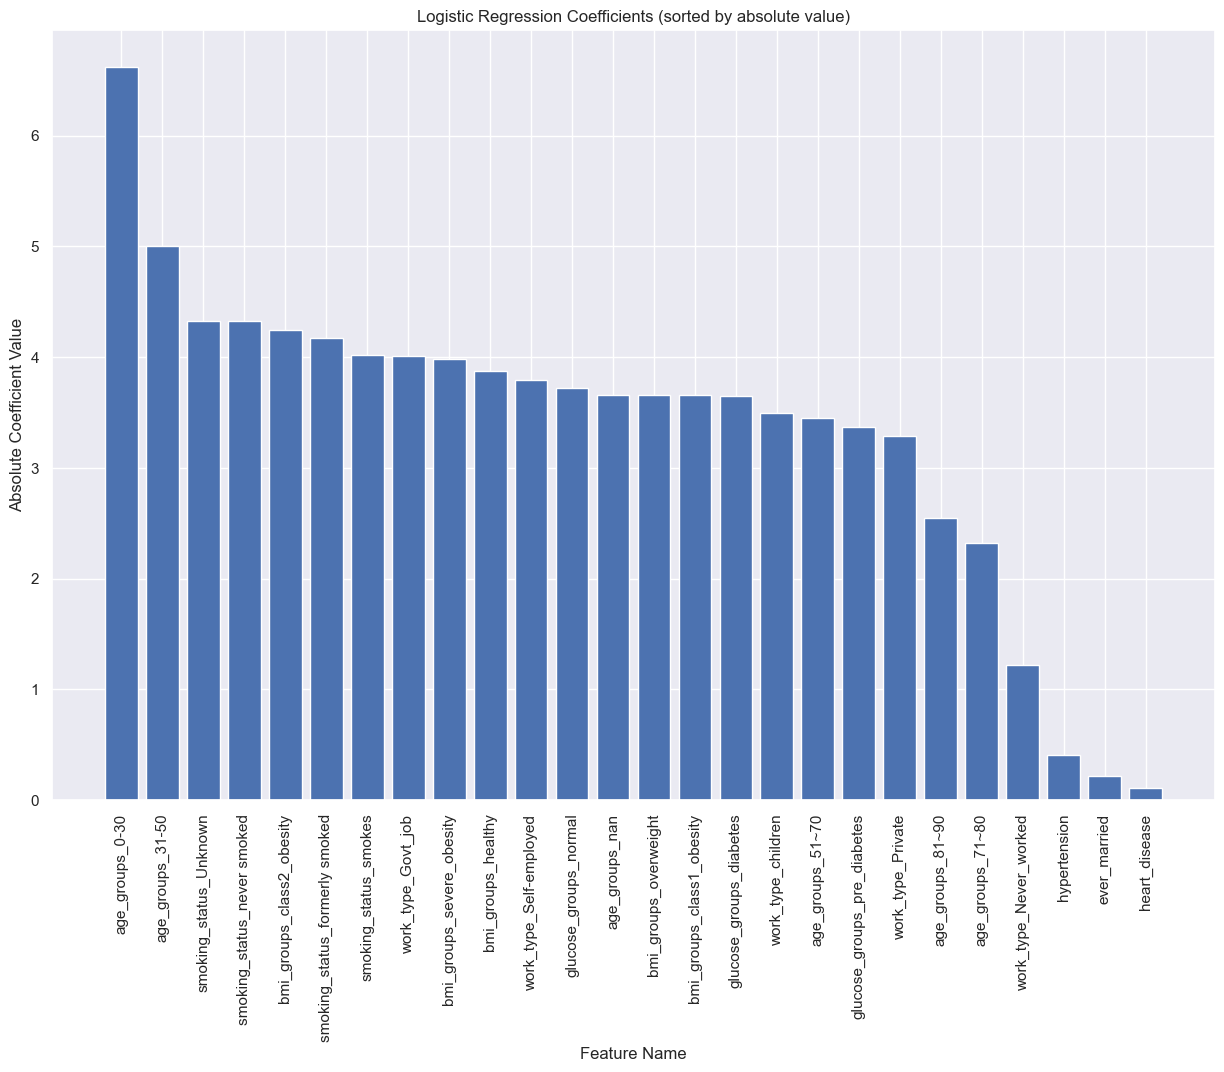

In [108]:
## Get the coefficients from the model
coefficients = model.coef_[0]

# Get the feature names
feature_names = test_X.columns

# Get the indices that would sort the absolute values of the coefficients in descending order
sorted_indices = np.argsort(abs(coefficients))[::-1]

# Rearrange the feature names and coefficients based on the sorted indices
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_coefficients = [abs(coefficients[i]) for i in sorted_indices]

# Create a figure with a larger size
fig = plt.figure(figsize=(15, 10))

# Create a sorted vertical bar chart
plt.bar(sorted_feature_names, sorted_coefficients)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize = 11)

# Add axis labels and a title
plt.xlabel('Feature Name')
plt.ylabel('Absolute Coefficient Value')
plt.title('Logistic Regression Coefficients (sorted by absolute value)')

# Show the plot
plt.show()

#### 5.3.4. Grid Search
- Grid search is a hyperparameter tuning technique used to find the best combination of hyperparameters for a machine learning model.
- The goal of grid search is to exhaustively search over a specified range of hyperparameters to find the combination that results in the best model performance.
- Hyperparameters are parameters that are not learned during training, but are set before training.

In [109]:
# Define the logistic regression classifier
lr = LogisticRegression(random_state=123)

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Define the cross-validation strategy
cv = 5

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='recall', cv=cv, n_jobs=-1)
grid_search.fit(train_X_smote, train_y_smote)

# Get the best estimator and its performance
best_estimator = grid_search.best_estimator_
best_recall = grid_search.best_score_

# Print the best estimator and its performance
print('Best estimator:', best_estimator)
print('Best recall:', best_recall)

# Evaluate the best estimator with cross-validation
scores = cross_val_score(best_estimator, train_X_smote, train_y_smote, cv=cv, scoring='recall')

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean recall:', np.mean(scores))

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Best estimator: LogisticRegression(C=100, random_state=123)
Best recall: 0.7514399925195194
Cross-validation scores: [0.36518771 0.85958904 0.80887372 0.88737201 0.83617747]
Mean recall: 0.7514399925195194


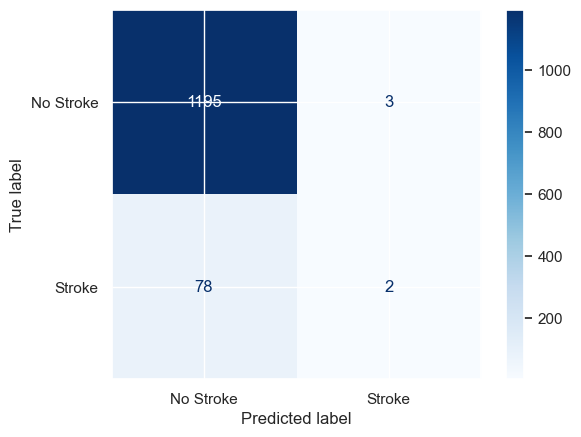

In [110]:
pred_y = best_estimator.predict(test_X)
cm = confusion_matrix(test_y, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

cmap = plt.get_cmap('Blues')
disp.plot(cmap=cmap)

plt.show()

In [111]:
print(classification_report(test_y, pred_y, target_names=['No Stroke', 'Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.94      1.00      0.97      1198
      Stroke       0.40      0.03      0.05        80

    accuracy                           0.94      1278
   macro avg       0.67      0.51      0.51      1278
weighted avg       0.91      0.94      0.91      1278



### 5.4. Random Forest after SMOTE
#### 5.4.1. Confusion Matrix

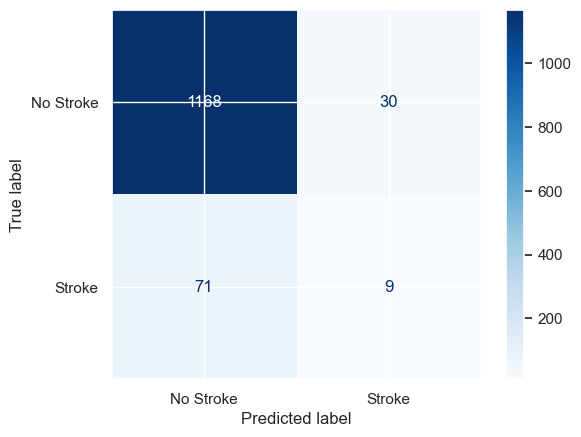

In [112]:
# Train the random forest model on the upsampled training set
model = RandomForestClassifier()
model.fit(train_X_smote, train_y_smote)

# Evaluate the model on the original testing set
pred_y = model.predict(test_X)
cm = confusion_matrix(test_y, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

cmap = plt.get_cmap('Blues')
disp.plot(cmap=cmap)

plt.show()

In [113]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y, target_names=['No Stroke', 'Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.94      0.97      0.96      1198
      Stroke       0.23      0.11      0.15        80

    accuracy                           0.92      1278
   macro avg       0.59      0.54      0.55      1278
weighted avg       0.90      0.92      0.91      1278



#### 5.4.2. Cross Validation

In [114]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation on the model
scores = cross_val_score(model, X, y, cv = 10)

# Print the mean and standard deviation of the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())
print('Standard deviation:', scores.std())

Cross-validation scores: [0.92759295 0.94129159 0.94911937 0.94520548 0.94520548 0.94911937
 0.94129159 0.94520548 0.94324853 0.93921569]
Mean score: 0.9426495529718737
Standard deviation: 0.005880943426430444


#### 5.4.3. Feature Importance

- This is the feature importnace of our model. 
- Feature importance refers to the extent to which a feature contributes to a predictive model's accuracy. It can be measured in various ways, such as the magnitude of the feature coefficients in a linear regression model, the reduction in impurity or entropy in decision trees, or the feature weights in neural networks. Feature importance is a relative measure, which means that it depends on the model and the other features in the dataset.

In [115]:
# Get the feature importances from the model
feature_importances = model.feature_importances_

# Print the feature importances
for feature_name, importance in zip(test_X.columns, feature_importances):
    print(f'{feature_name}: {importance}')

hypertension: 0.0968505174909619
heart_disease: 0.07546027579921721
ever_married: 0.08271005930192711
work_type_Govt_job: 0.02460116830723989
work_type_Never_worked: 7.480848462175453e-05
work_type_Private: 0.036663156459794316
work_type_Self-employed: 0.034946474424862005
work_type_children: 0.005094329785284068
smoking_status_Unknown: 0.02919220348203567
smoking_status_formerly smoked: 0.03285017595036065
smoking_status_never smoked: 0.044016379816582706
smoking_status_smokes: 0.030674940634831064
age_groups_0-30: 0.06101197572882863
age_groups_31-50: 0.07484207392695823
age_groups_51~70: 0.05431252621373635
age_groups_71~80: 0.07798659485109315
age_groups_81~90: 0.012279373539958583
age_groups_nan: 0.0007210774562112301
glucose_groups_diabetes: 0.0218758198624855
glucose_groups_normal: 0.04767895837878091
glucose_groups_pre_diabetes: 0.0142797679065126
bmi_groups_class1_obesity: 0.033716022215139654
bmi_groups_class2_obesity: 0.02436103451326284
bmi_groups_healthy: 0.029745578579698

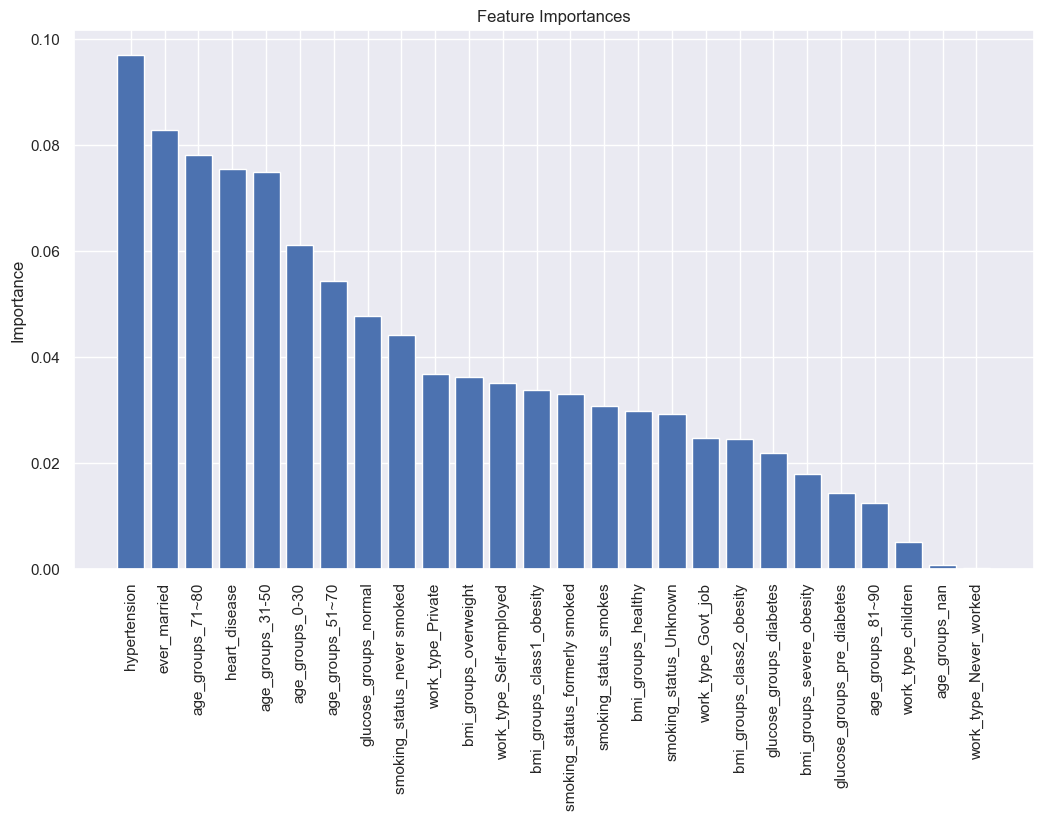

In [116]:
# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = test_X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a figure with a larger size
fig = plt.figure(figsize=(16, 7))

# Create a bar chart
plt.bar(sorted_features, sorted_importances)

# Add labels and title
plt.ylabel('Importance')
plt.title('Feature Importances')

# Adjust the margins to create extra space on the left and right sides
plt.subplots_adjust(left=0.3, right=0.9)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90, fontsize=11)

# Display the plot
plt.show()

#### 5.4.4. Grid Search

In [117]:
# Define the random forest classifier
rf = RandomForestClassifier(random_state=123)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 20, 30, None]
}

# Define the cross-validation strategy
cv = 5

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=cv, n_jobs=-1)
grid_search.fit(train_X_smote, train_y_smote)

# Get the best estimator and its performance
best_estimator = grid_search.best_estimator_
best_recall = grid_search.best_score_

# Print the best estimator and its performance
print('Best estimator:', best_estimator)
print('Best recall:', best_recall)

# Evaluate the best estimator with cross-validation
scores = cross_val_score(best_estimator, train_X_smote, train_y_smote, cv=cv, scoring='recall')

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean recall:', np.mean(scores))

Best estimator: RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=123)
Best recall: 0.8859764364860443
Cross-validation scores: [0.60409556 0.95547945 0.94197952 0.96928328 0.95904437]
Mean recall: 0.8859764364860443


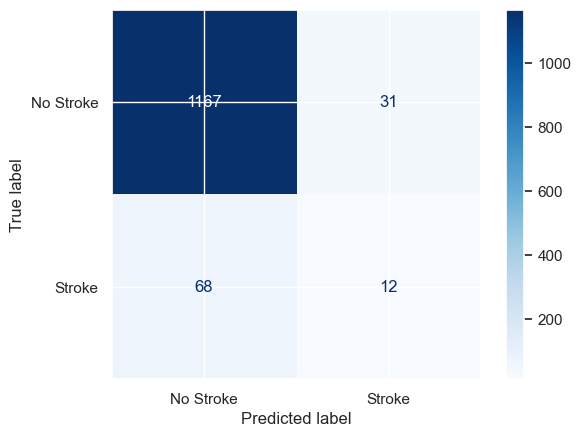

In [118]:
pred_y = best_estimator.predict(test_X)
cm = confusion_matrix(test_y, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

cmap = plt.get_cmap('Blues')
disp.plot(cmap=cmap)

plt.show()

In [119]:
print(classification_report(test_y, pred_y, target_names=['No Stroke', 'Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.94      0.97      0.96      1198
      Stroke       0.28      0.15      0.20        80

    accuracy                           0.92      1278
   macro avg       0.61      0.56      0.58      1278
weighted avg       0.90      0.92      0.91      1278



## 6. Final Result
- After comparing the performance of various models and tuning hyperparameters with GridSearchCV, we found that the Logistic Regression model before Gridsearch performed the best on the upsampled data.
- The precision-recall score for predicting stroke cases is 0.67 and 0.05 respectively.
- With this model, we can predict the likelihood of a patient having a stroke based on several risk factors. However, further testing and validation may be necessary before implementing the model in a clinical setting.

In [120]:
df.to_csv('stroke_new.csv', index=False)